In [1]:
from functions_for_all_nutrients import *

In [2]:
username = !whoami
username

['alibow']

In [3]:
index_cols=['location_id','sex_id','age_group_id']

age_group_ids = [2,3,4,5]
sex_ids = [1,2]
coverage_levels = [0.2,0.5,0.8]
years = [2021,2022,2023,2024,2025]

In [4]:
nutrients = ['vitamin a','zinc','iron','folic acid']
vehicles = ['oil','wheat flour','maize flour', 'industry oil','industry wheat','salt']

In [5]:
coverage_data_dir = f'/ihme/homes/{username[0]}/notebooks/vivarium_research_lsff/data_prep/outputs/waterfall_coverage_all_vehicles.csv'
coverage_confidence_data_dir = f'/ihme/homes/{username[0]}/notebooks/vivarium_research_lsff/data_prep/outputs/data_richness_score.csv'

In [6]:
location_ids = pd.read_csv(coverage_data_dir).location_id.unique()
location_ids

array([168, 161, 201, 205, 202,   6, 171, 141, 179, 207, 163,  11, 180,
       181, 184,  15, 164, 213, 214, 165, 196, 522, 190, 189,  20])

In [7]:
coverage_u5 = pd.DataFrame()
for nutrient in nutrients:
    if nutrient == 'vitamin a':
        vehicles = ['oil','wheat flour','maize flour','industry oil','industry wheat']
    elif nutrient == 'folic acid':
        vehicls = ['wheat flour','maize flour','industry wheat','salt']
    else:
        vehicles = ['wheat flour', 'maize flour','industry wheat']
    for vehicle in vehicles:
        print(f'calculating {nutrient}/{vehicle}')
        cov_a, cov_b = generate_logical_coverage_draws(coverage_data_dir, location_ids, nutrient, vehicle, 'U5')
        baseline_coverage, counterfactual_coverage = generate_coverage_dfs(cov_a, cov_b, years, coverage_levels)
        baseline_coverage['coverage_level'] = 'baseline'
        cov_b['coverage_level'] = 'maximum'
        coverage = pd.concat([baseline_coverage.reset_index(),
                              counterfactual_coverage.reset_index(),
                              cov_b.reset_index()], ignore_index=True)
        coverage['nutrient'] = nutrient
        coverage['vehicle'] = vehicle
        coverage_u5 = pd.concat([coverage_u5, coverage], ignore_index=True)

coverage_u5

calculating vitamin a/oil
Excluded location IDs [] due to missing data


KeyboardInterrupt: 

In [16]:
baseline_coverage_data_u5 = coverage_u5.loc[coverage_u5.coverage_level == 'baseline'].drop(columns='coverage_level')
baseline_coverage_data_u5.to_pickle('results_raw/baseline_coverage_data_u5.pkl')
counterfactual_coverage_data_u5 = coverage_u5.loc[coverage_u5.coverage_level.isin([0.2,0.5,0.8])]
counterfactual_coverage_data_u5.to_pickle('results_raw/counterfactual_coverage_data_u5.pkl')

In [18]:
coverage_wra = pd.DataFrame()
for nutrient in ['folic acid','iron']:
    if nutrient == 'folic acid':
        vehicles = ['wheat flour','maize flour','industry wheat','salt']
    else:
        vehicles = ['wheat flour', 'maize flour','industry wheat']
    for vehicle in vehicles:
        print(f'calculating {nutrient}/{vehicle}')
        cov_a, cov_b = generate_logical_coverage_draws(coverage_data_dir, location_ids, nutrient, vehicle, 'WRA')
        baseline_coverage, counterfactual_coverage = generate_coverage_dfs(cov_a, cov_b, years, coverage_levels)
        baseline_coverage['coverage_level'] = 'baseline'
        cov_b['coverage_level'] = 'maximum'
        coverage = pd.concat([baseline_coverage.reset_index(),
                              counterfactual_coverage.reset_index(),
                              cov_b.reset_index()], ignore_index=True)
        coverage['nutrient'] = nutrient
        coverage['vehicle'] = vehicle
        coverage_wra = pd.concat([coverage_wra, coverage], ignore_index=True)

coverage_wra

calculating folic acid/wheat flour
Excluded location IDs [] due to missing data
Excluded [11]/folic acid/wheat flour due to impossible logical values


/ihme/code/central_comp/miniconda_svc-ccomp/envs/v109/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  from ipykernel import kernelapp as app


calculating folic acid/maize flour
Excluded location IDs [] due to missing data
calculating folic acid/industry wheat
Excluded location IDs [] due to missing data
calculating folic acid/salt
Excluded location IDs [] due to missing data
calculating iron/wheat flour
Excluded location IDs [] due to missing data
Excluded [11]/iron/wheat flour due to impossible logical values
calculating iron/maize flour
Excluded location IDs [] due to missing data
calculating iron/industry wheat
Excluded location IDs [] due to missing data


,coverage_level,draw_0,draw_1,draw_10,draw_100,draw_101,draw_102,draw_103,draw_104,draw_105,...,draw_994,draw_995,draw_996,draw_997,draw_998,draw_999,location_id,year,nutrient,vehicle
0,baseline,0.048558,0.040897,0.057464,0.055794,0.078894,0.069322,0.066442,0.074779,0.040128,...,0.038659,0.063932,0.084612,0.040307,0.073570,0.062551,6,2021.0,folic acid,wheat flour
1,baseline,0.048558,0.040897,0.057464,0.055794,0.078894,0.069322,0.066442,0.074779,0.040128,...,0.038659,0.063932,0.084612,0.040307,0.073570,0.062551,6,2022.0,folic acid,wheat flour
2,baseline,0.048558,0.040897,0.057464,0.055794,0.078894,0.069322,0.066442,0.074779,0.040128,...,0.038659,0.063932,0.084612,0.040307,0.073570,0.062551,6,2023.0,folic acid,wheat flour
3,baseline,0.048558,0.040897,0.057464,0.055794,0.078894,0.069322,0.066442,0.074779,0.040128,...,0.038659,0.063932,0.084612,0.040307,0.073570,0.062551,6,2024.0,folic acid,wheat flour
4,baseline,0.048558,0.040897,0.057464,0.055794,0.078894,0.069322,0.066442,0.074779,0.040128,...,0.038659,0.063932,0.084612,0.040307,0.073570,0.062551,6,2025.0,folic acid,wheat flour
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3292,maximum,0.384918,0.509489,0.417126,0.425333,0.399980,0.370582,0.417659,0.322832,0.529279,...,0.320056,0.510768,0.392551,0.383657,0.455659,0.398878,213,NaN,iron,industry wheat
3293,maximum,0.575995,0.717860,0.594509,0.431738,0.681824,0.690181,0.725587,0.680191,0.662809,...,0.613593,0.461058,0.574015,0.667194,0.697420,0.532498,214,NaN,iron,industry wheat
3294,maximum,0.647772,0.809633,0.735246,0.854111,0.938948,0.845796,0.834466,0.704683,0.957604,...,0.957054,0.771944,0.883629,0.923808,0.883094,0.606885,522,NaN,iron,industry wheat
3295,maximum,0.325654,0.459233,0.381283,0.447082,0.350880,0.470096,0.415443,0.429438,0.436325,...,0.444409,0.466634,0.421585,0.454166,0.421092,0.365674,180,NaN,iron,industry wheat


In [19]:
baseline_coverage_data_wra = coverage_wra.loc[coverage_wra.coverage_level == 'baseline'].drop(columns='coverage_level')
baseline_coverage_data_wra.to_pickle('results_raw/baseline_coverage_data_wra.pkl')
counterfactual_coverage_data_wra = coverage_wra.loc[coverage_wra.coverage_level.isin([0.2,0.5,0.8])]
counterfactual_coverage_data_wra.to_pickle('results_raw/counterfactual_coverage_data_wra.pkl')

In [12]:
coverage_u5 = pd.concat([pd.read_pickle('results_raw/baseline_coverage_data_u5.pkl'),
                        pd.read_pickle('results_raw/counterfactual_coverage_data_u5.pkl')]).replace(np.nan,'baseline')
coverage_wra = pd.concat([pd.read_pickle('results_raw/baseline_coverage_data_wra.pkl'),
                        pd.read_pickle('results_raw/counterfactual_coverage_data_wra.pkl')]).replace(np.nan,'baseline')

/ihme/code/central_comp/miniconda_svc-ccomp/envs/v109/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  
/ihme/code/central_comp/miniconda_svc-ccomp/envs/v109/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


In [31]:
coverage_u5 = pd.read_pickle('results_raw/coverage_u5.pkl')

In [32]:
coverage_u5_summarized = (coverage_u5
                   .set_index([c for c in coverage_u5.columns if 'draw' not in c])
                   .apply(pd.DataFrame.describe, percentiles=[0.025,0.975], axis=1)
                   .filter(['mean','2.5%','97.5%'])
                   .reset_index())

#coverage_wra_summarized = (coverage_wra
#                   .set_index([c for c in coverage_wra.columns if 'draw' not in c])
#                   .apply(pd.DataFrame.describe, percentiles=[0.025,0.975], axis=1)
#                   .filter(['mean','2.5%','97.5%'])
#                   .reset_index())
coverage_u5_summarized

,coverage_level,location_id,year,nutrient,vehicle,mean,2.5%,97.5%
0,baseline,6,2021.0,vitamin a,oil,0.049763,0.040347,0.059293
1,baseline,6,2022.0,vitamin a,oil,0.049763,0.040347,0.059293
2,baseline,6,2023.0,vitamin a,oil,0.049763,0.040347,0.059293
3,baseline,6,2024.0,vitamin a,oil,0.049763,0.040347,0.059293
4,baseline,6,2025.0,vitamin a,oil,0.049763,0.040347,0.059293
...,...,...,...,...,...,...,...,...
6568,maximum,214,NaN,folic acid,industry wheat,0.622190,0.398649,0.840721
6569,maximum,522,NaN,folic acid,industry wheat,0.788196,0.544156,0.980401
6570,maximum,180,NaN,folic acid,industry wheat,0.380430,0.260677,0.505571
6571,maximum,189,NaN,folic acid,industry wheat,0.454959,0.344856,0.595059


([<matplotlib.axis.XTick at 0x2ba7ff0130b8>,
 [Text(0.4, 0, 'Literature oil'),
  Text(1.4, 0, 'Industry oil'),
  Text(2.4, 0, 'Maize flour'),
  Text(3.4, 0, 'Literature Wheat Flour'),
  Text(4.4, 0, 'Industry Wheat Flour')])

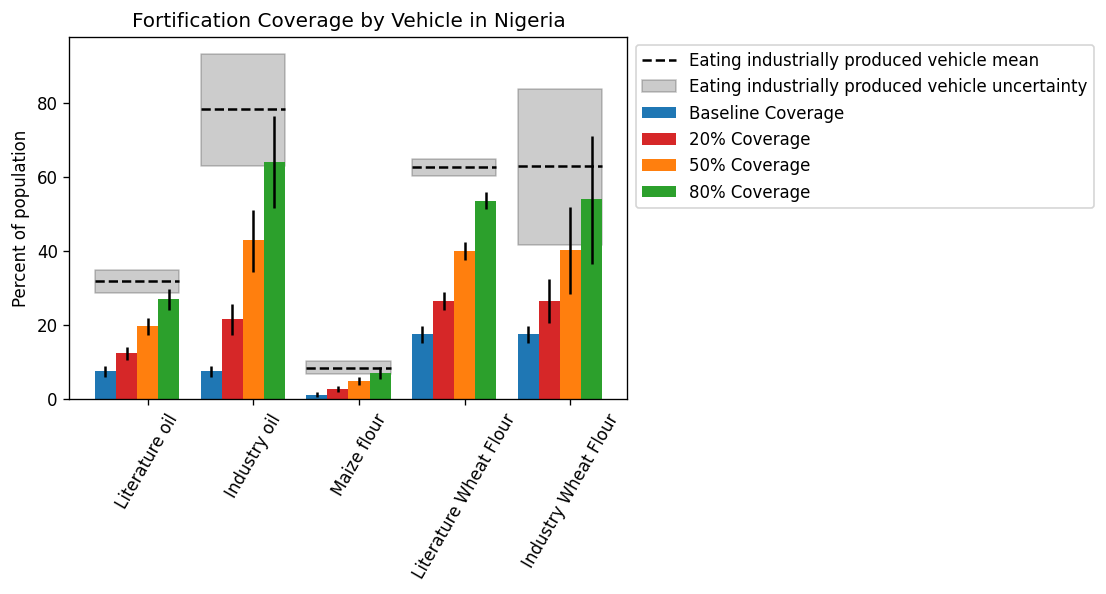

In [56]:
vehicles=['oil','industry oil','maize flour','wheat flour','industry wheat']
plt.figure(figsize=(6, 4), dpi=120)
data = (coverage_u5_summarized
        .loc[coverage_u5_summarized.location_id==214]
        .loc[coverage_u5_summarized.year.isin([2025,np.nan])])
data['order'] = np.where(data.vehicle=='oil', 1,
                        np.where(data.vehicle=='industry oil', 2, 
                                np.where(data.vehicle=='maize flour', 3,
                                        np.where(data.vehicle=='wheat flour', 4,
                                                np.where(data.vehicle=='industry oil', 5, 
                                                         np.where(data.vehicle=='salt', 6, np.nan))))))
data = data.loc[data.vehicle.isin(vehicles)].loc[data.nutrient=='vitamin a']
data = data.sort_values(by='order')
data['mean'] = data['mean'] * 100
data['2.5%'] = data['2.5%'] * 100
data['97.5%'] = data['97.5%'] * 100
base = data.loc[data.coverage_level=='baseline']
alt_20 = data.loc[data.coverage_level==0.2]
alt_50 = data.loc[data.coverage_level==0.5]
alt_80 = data.loc[data.coverage_level==0.8]
barWidth = 0.20
a = np.arange(len(base))
b = [x + barWidth for x in a]
c = [x + barWidth for x in b]
d = [x + barWidth for x in c]
plt.bar(a, base['mean'], width=barWidth, yerr = [base['mean'] - base['2.5%'],base['97.5%'] - base['mean']], 
        label='Baseline Coverage')
plt.bar(b, alt_20['mean'], width=barWidth, yerr = [alt_20['mean'] - alt_20['2.5%'],alt_20['97.5%'] - alt_20['mean']], 
        color='tab:red', label='20% Coverage')
plt.bar(c, alt_50['mean'], width=barWidth, yerr = [alt_50['mean'] - alt_50['2.5%'],alt_50['97.5%'] - alt_50['mean']], 
        color='tab:orange', label='50% Coverage')
plt.bar(d, alt_80['mean'], width=barWidth, yerr = [alt_80['mean'] - alt_80['2.5%'],alt_80['97.5%'] - alt_80['mean']], 
        color='tab:green', label='80% Coverage')

df = data.loc[data.coverage_level=='maximum']
for i in list(range(0,len(df.vehicle.unique()))):
    if i == 0:
        plt.hlines(df.loc[df.vehicle==df.vehicle.unique()[i]]['mean'], -0.1 + i, 0.7 + i, 
               linestyle='dashed', color='black', label='Eating industrially produced vehicle mean')
        plt.fill_between([-0.1 + i, 0.7 + i], [df.loc[df.vehicle==df.vehicle.unique()[i]]['2.5%'].values[0]] * 2,
                    [df.loc[df.vehicle==df.vehicle.unique()[i]]['97.5%'].values[0]] * 2,
                    alpha=0.2, color='black', label='Eating industrially produced vehicle uncertainty')
    else: 
        plt.hlines(df.loc[df.vehicle==df.vehicle.unique()[i]]['mean'], -0.1 + i, 0.7 + i, 
               linestyle='dashed', color='black')
        plt.fill_between([-0.1 + i, 0.7 + i], [df.loc[df.vehicle==df.vehicle.unique()[i]]['2.5%'].values[0]] * 2,
                        [df.loc[df.vehicle==df.vehicle.unique()[i]]['97.5%'].values[0]] * 2,
                        alpha=0.2, color='black')
l = get_ids('location')
df = df.merge(l, on='location_id')
plt.legend(bbox_to_anchor=[1,1])
plt.title(f'Fortification Coverage by Vehicle in Nigeria')
plt.ylabel('Percent of population')
df['vehicle'] = (df.vehicle.str.capitalize()
                 .str.replace('Oil','Literature oil')
                 .str.replace('Wheat flour','Literature Wheat Flour')
                 .str.replace('Industry wheat','Industry Wheat Flour'))
plt.xticks([r + barWidth * 2 for r in range(len(df))], df.vehicle.values, rotation=60)

In [27]:
base

,coverage_level,location_id,nutrient,vehicle,year,mean,2.5%,97.5%,order
119,baseline,214,vitamin a,oil,2025.0,7.462653,5.988887,8.905924,1.0
324,baseline,214,vitamin a,maize flour,2025.0,1.228553,0.575428,1.891643,3.0
239,baseline,214,vitamin a,wheat flour,2025.0,17.481291,15.128639,19.771397,4.0
569,baseline,214,vitamin a,industry wheat,2025.0,17.481291,15.128639,19.771397,NaN


In [ ]:
plt.figure(figsize=(15, 4), dpi=120)

data = (data
        .loc[data.vehicle==vehicle]
        .loc[data.nutrient.isin(['na',nutrient])]
        #.loc[data.location_id.isin(location_ids)]
        .loc[data.year.isin([2025,np.nan])]
        #.sort_values(by=['location_id'], ascending=False))
        .sort_values(by=['location_id'], ascending=False))
data['mean'] = data['mean'] * 100
data['2.5%'] = data['2.5%'] * 100
data['97.5%'] = data['97.5%'] * 100
base = data.loc[data.coverage_level=='baseline']
alt_20 = data.loc[data.coverage_level==0.2]
alt_50 = data.loc[data.coverage_level==0.5]
alt_80 = data.loc[data.coverage_level==0.8]
barWidth = 0.20
a = np.arange(len(base))
b = [x + barWidth for x in a]
c = [x + barWidth for x in b]
d = [x + barWidth for x in c]
plt.bar(a, base['mean'], width=barWidth, yerr = [base['mean'] - base['2.5%'],base['97.5%'] - base['mean']], 
        label='Baseline Coverage')
plt.bar(b, alt_20['mean'], width=barWidth, yerr = [alt_20['mean'] - alt_20['2.5%'],alt_20['97.5%'] - alt_20['mean']], 
        color='tab:red', label='20% Coverage')
plt.bar(c, alt_50['mean'], width=barWidth, yerr = [alt_50['mean'] - alt_50['2.5%'],alt_50['97.5%'] - alt_50['mean']], 
        color='tab:orange', label='50% Coverage')
plt.bar(d, alt_80['mean'], width=barWidth, yerr = [alt_80['mean'] - alt_80['2.5%'],alt_80['97.5%'] - alt_80['mean']], 
        color='tab:green', label='80% Coverage')

df = data.loc[data.coverage_level=='maximum']
for i in list(range(0,len(df.location_id.unique()))):
    if i == 0:
        plt.hlines(df.loc[df.location_id==df.location_id.unique()[i]]['mean'], -0.1 + i, 0.7 + i, 
               linestyle='dashed', color='black', label='Eating industrially produced vehicle')
    else: 
        plt.hlines(df.loc[df.location_id==df.location_id.unique()[i]]['mean'], -0.1 + i, 0.7 + i, 
               linestyle='dashed', color='black')
    plt.fill_between([-0.1 + i, 0.7 + i], [df.loc[df.location_id==df.location_id.unique()[i]]['2.5%'].values[0]] * 2,
                    [df.loc[df.location_id==df.location_id.unique()[i]]['97.5%'].values[0]] * 2,
                    alpha=0.2, color='black')
l = get_ids('location')
df = df.merge(l, on='location_id')

plt.legend(bbox_to_anchor=[1.3,1])
plt.title(f'{nutrient.capitalize()} in {vehicle} fortification coverage')
plt.ylabel('Percent of population')
plt.xticks([r + barWidth * 1.5 for r in range(len(df))], df.location_name.values, rotation=90)

In [21]:
#confidence = pd.read_csv(coverage_confidence_data_dir).drop_duplicates()
#print('WARNING: hard code drop of duplicate vietnam entry')
#l = get_ids('location')
#confidence = confidence.merge(l.filter(['location_name','location_id']), on='location_name')
#coverage_u5_summarized_with_confidence = coverage_u5_summarized.merge(confidence, on=['location_id','vehicle','nutrient'])
#coverage_u5_summarized_with_confidence['label'] = (np.where(coverage_u5_summarized_with_confidence.score == 4, '***** ',
#                                                      np.where(coverage_u5_summarized_with_confidence.score == 3, '**** ',
#                                                               np.where(coverage_u5_summarized_with_confidence.score == 2, '*** ',
#                                                                        np.where(coverage_u5_summarized_with_confidence.score == 1, '** ',
#                                                                                 np.where(coverage_u5_summarized_with_confidence.score == 0, '* ', ' ')))))
#                                                   + coverage_u5_summarized_with_confidence.location_name)

#assert len(coverage_u5_summarized) == len(coverage_u5_summarized_with_confidence)
#coverage_u5_summarized_with_confidence.head()

In [22]:
#coverage_wra_summarized_with_confidence = coverage_wra_summarized.merge(confidence, on=['location_id','vehicle','nutrient'])
#coverage_wra_summarized_with_confidence['label'] = (np.where(coverage_wra_summarized_with_confidence.score == 4, '***** ',
#                                                      np.where(coverage_wra_summarized_with_confidence.score == 3, '**** ',
#                                                               np.where(coverage_wra_summarized_with_confidence.score == 2, '*** ',
#                                                                        np.where(coverage_wra_summarized_with_confidence.score == 1, '** ',
#                                                                                 np.where(coverage_wra_summarized_with_confidence.score == 0, '* ', ' ')))))
#                                                   + coverage_wra_summarized_with_confidence.location_name)
#assert len(coverage_wra_summarized) == len(coverage_wra_summarized_with_confidence)
#coverage_wra_summarized_with_confidence.head()

In [23]:
coverage_u5_summarized.to_pickle('results_raw/coverage_u5.pkl')
coverage_wra_summarized.to_pickle('results_raw/coverage_wra.pkl')

In [14]:
def make_coverage_bar_charts(data, location_ids, nutrient, vehicle):
    plt.figure(figsize=(15, 4), dpi=120)
    
    data = (data
            .loc[data.vehicle==vehicle]
            .loc[data.nutrient.isin(['na',nutrient])]
            #.loc[data.location_id.isin(location_ids)]
            .loc[data.year.isin([2025,np.nan])]
            #.sort_values(by=['location_id'], ascending=False))
            .sort_values(by=['location_id'], ascending=False))
    data['mean'] = data['mean'] * 100
    data['2.5%'] = data['2.5%'] * 100
    data['97.5%'] = data['97.5%'] * 100
    base = data.loc[data.coverage_level=='baseline']
    alt_20 = data.loc[data.coverage_level==0.2]
    alt_50 = data.loc[data.coverage_level==0.5]
    alt_80 = data.loc[data.coverage_level==0.8]
    barWidth = 0.20
    a = np.arange(len(base))
    b = [x + barWidth for x in a]
    c = [x + barWidth for x in b]
    d = [x + barWidth for x in c]
    plt.bar(a, base['mean'], width=barWidth, yerr = [base['mean'] - base['2.5%'],base['97.5%'] - base['mean']], 
            label='Baseline Coverage')
    plt.bar(b, alt_20['mean'], width=barWidth, yerr = [alt_20['mean'] - alt_20['2.5%'],alt_20['97.5%'] - alt_20['mean']], 
            color='tab:red', label='20% Coverage')
    plt.bar(c, alt_50['mean'], width=barWidth, yerr = [alt_50['mean'] - alt_50['2.5%'],alt_50['97.5%'] - alt_50['mean']], 
            color='tab:orange', label='50% Coverage')
    plt.bar(d, alt_80['mean'], width=barWidth, yerr = [alt_80['mean'] - alt_80['2.5%'],alt_80['97.5%'] - alt_80['mean']], 
            color='tab:green', label='80% Coverage')

    df = data.loc[data.coverage_level=='maximum']
    for i in list(range(0,len(df.location_id.unique()))):
        if i == 0:
            plt.hlines(df.loc[df.location_id==df.location_id.unique()[i]]['mean'], -0.1 + i, 0.7 + i, 
                   linestyle='dashed', color='black', label='Eating industrially produced vehicle')
        else: 
            plt.hlines(df.loc[df.location_id==df.location_id.unique()[i]]['mean'], -0.1 + i, 0.7 + i, 
                   linestyle='dashed', color='black')
        plt.fill_between([-0.1 + i, 0.7 + i], [df.loc[df.location_id==df.location_id.unique()[i]]['2.5%'].values[0]] * 2,
                        [df.loc[df.location_id==df.location_id.unique()[i]]['97.5%'].values[0]] * 2,
                        alpha=0.2, color='black')
    l = get_ids('location')
    df = df.merge(l, on='location_id')
    
    plt.legend(bbox_to_anchor=[1.3,1])
    plt.title(f'{nutrient.capitalize()} in {vehicle} fortification coverage')
    plt.ylabel('Percent of population')
    plt.xticks([r + barWidth * 1.5 for r in range(len(df))], df.location_name.values, rotation=90)

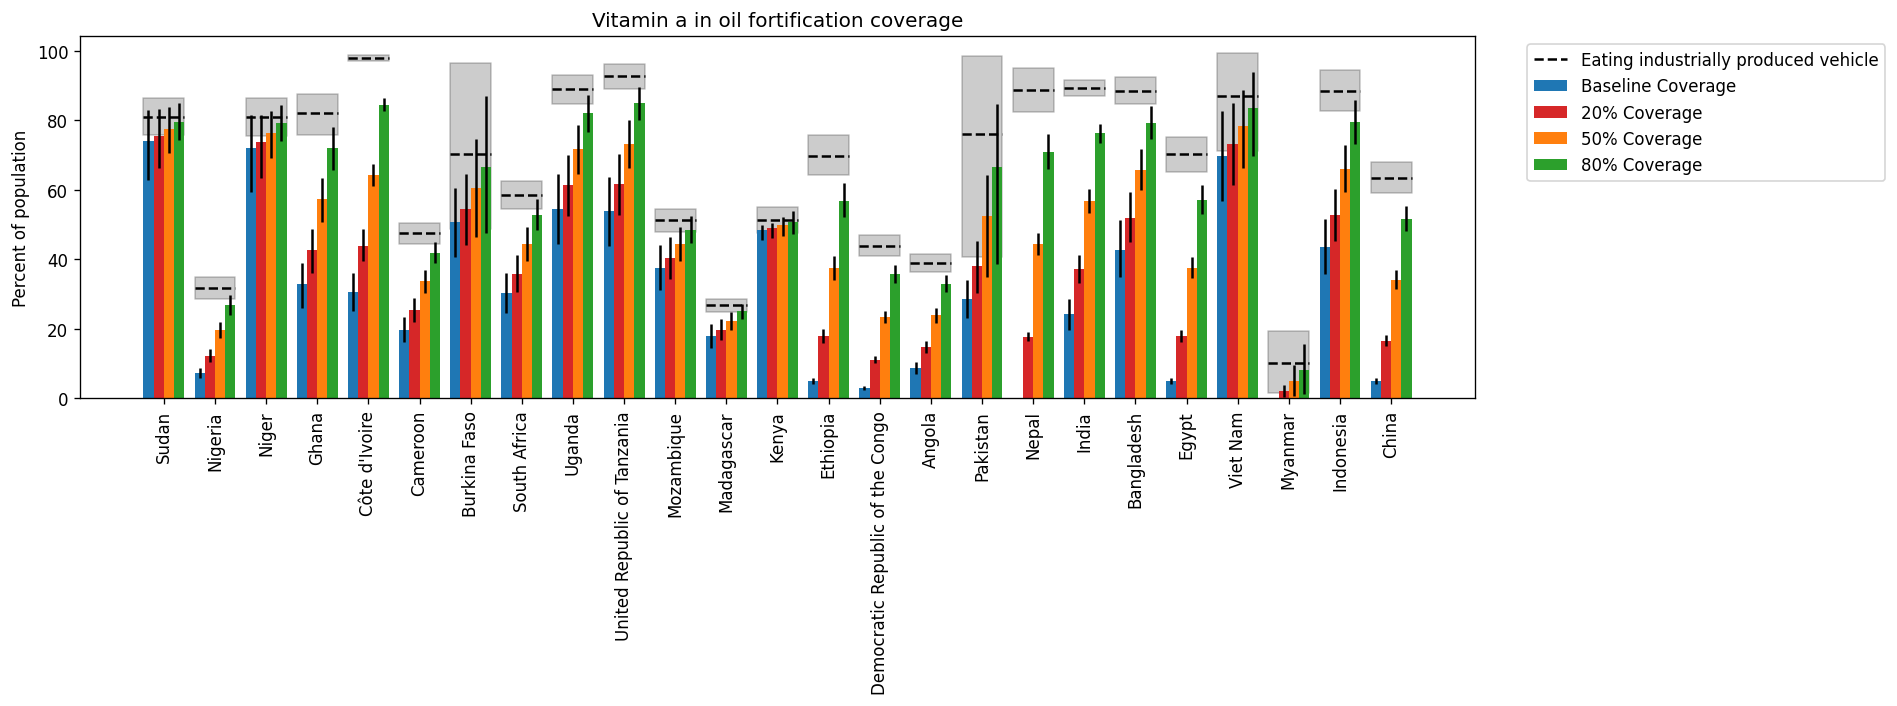

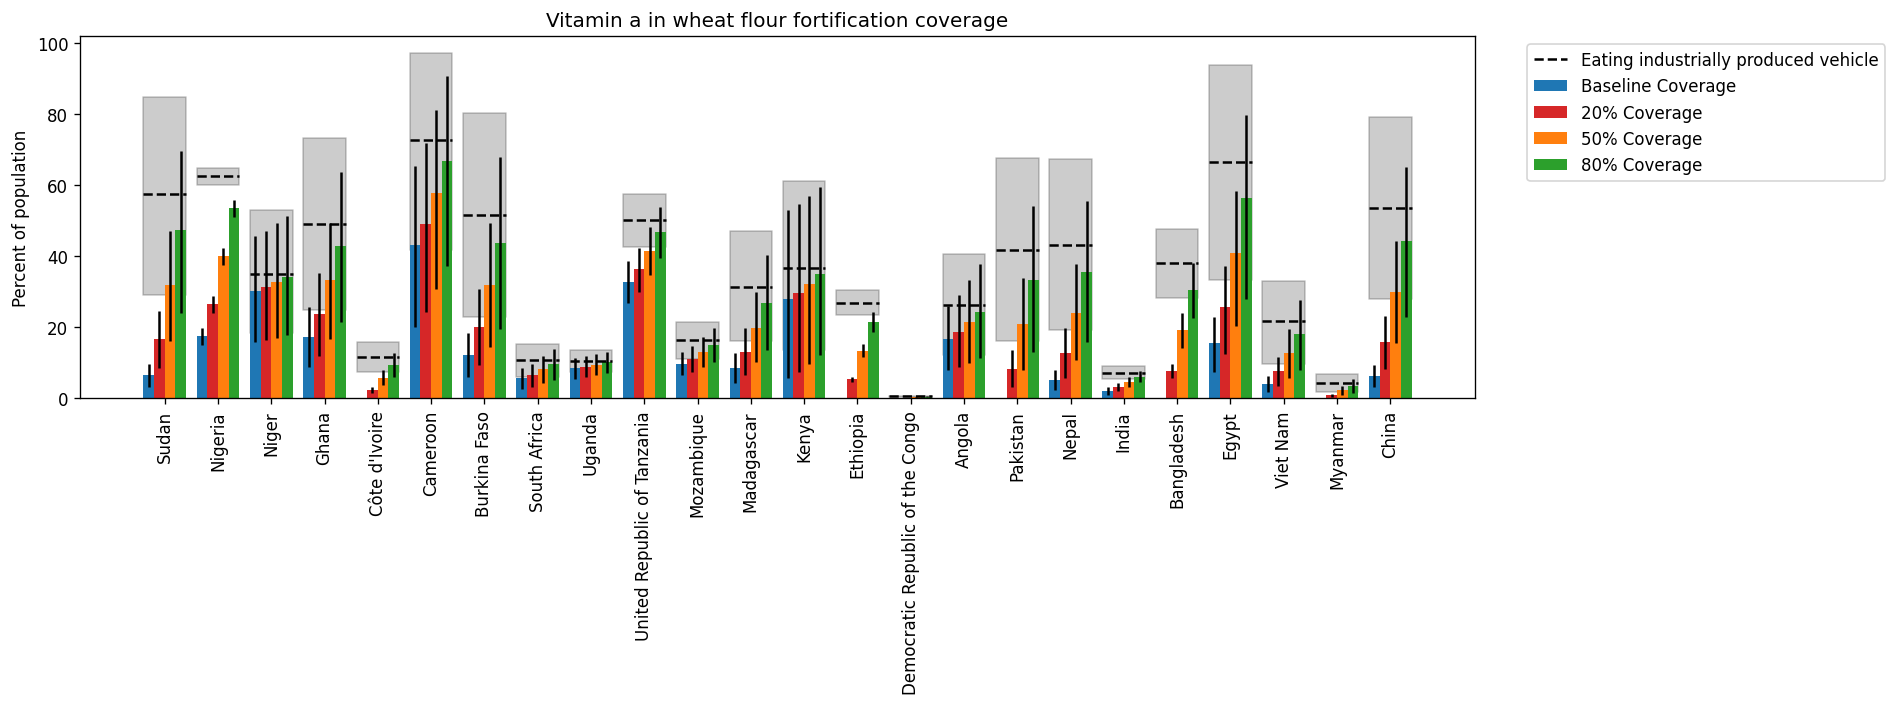

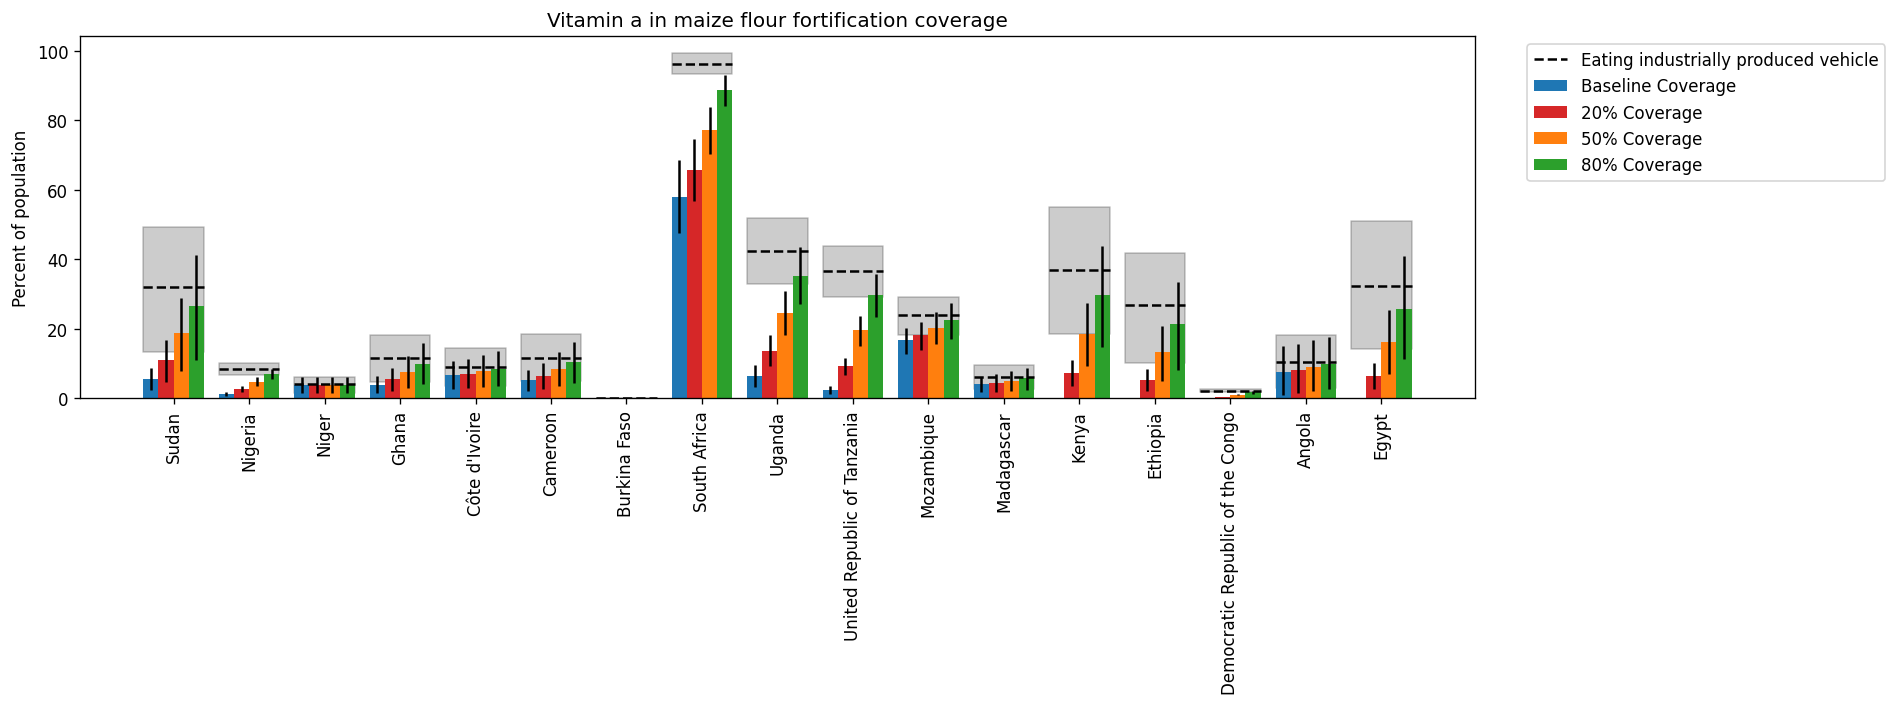

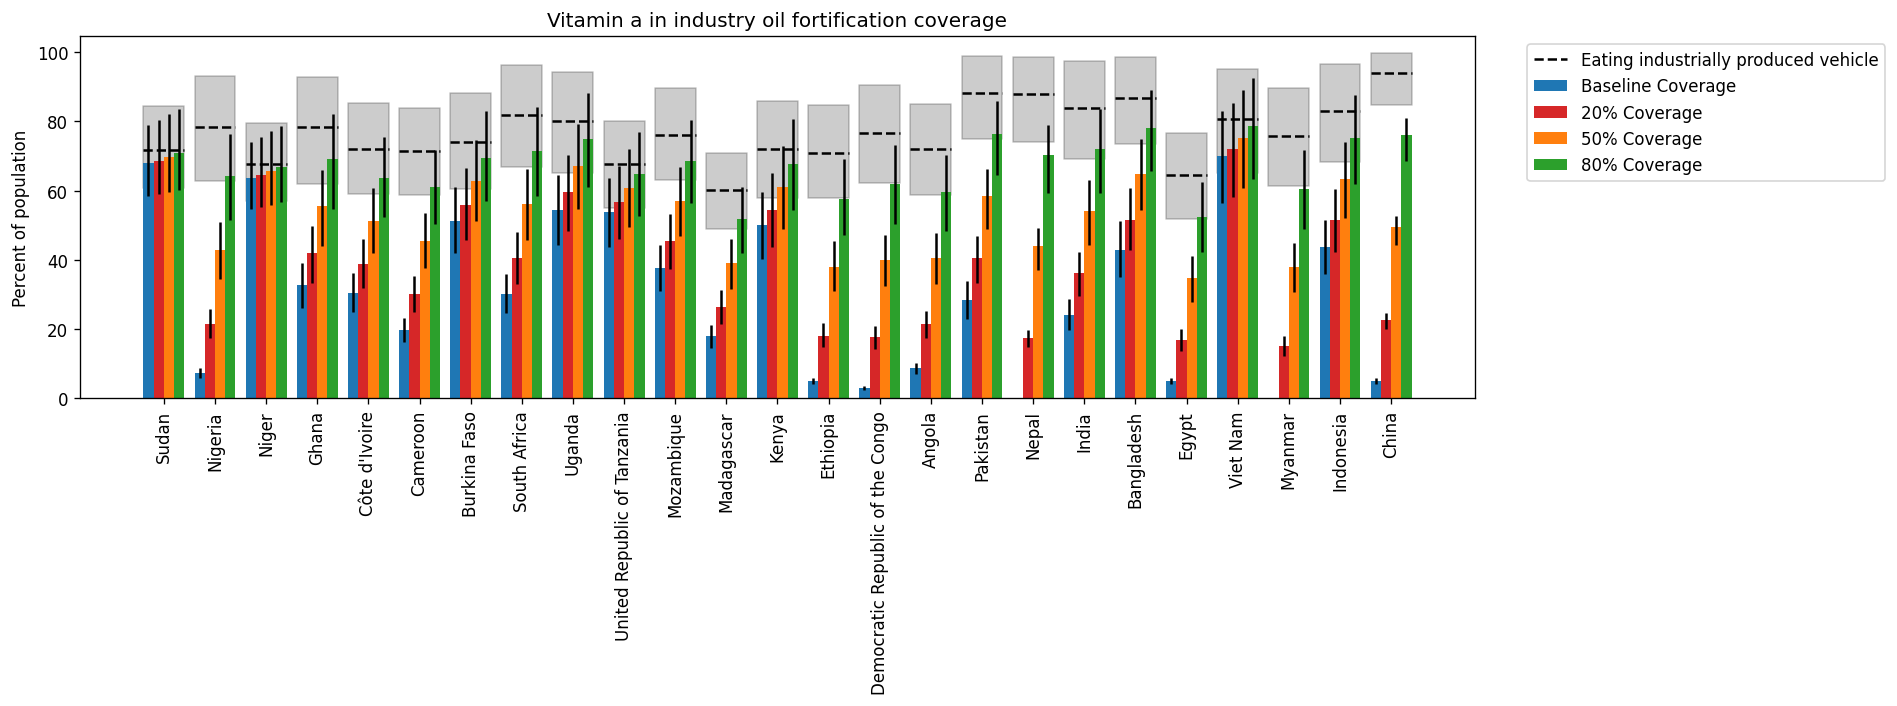

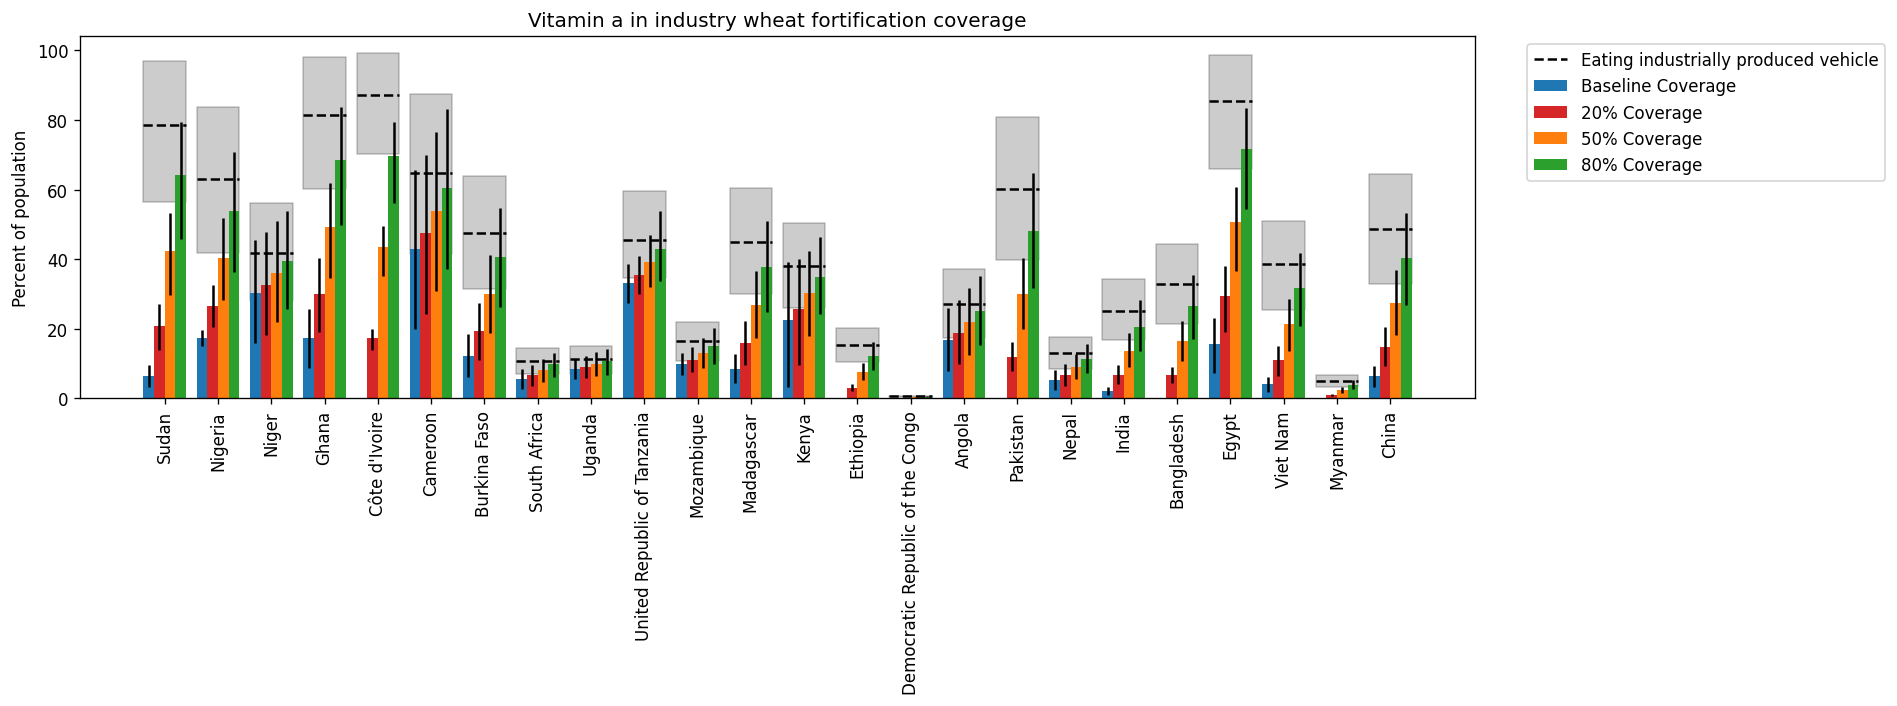

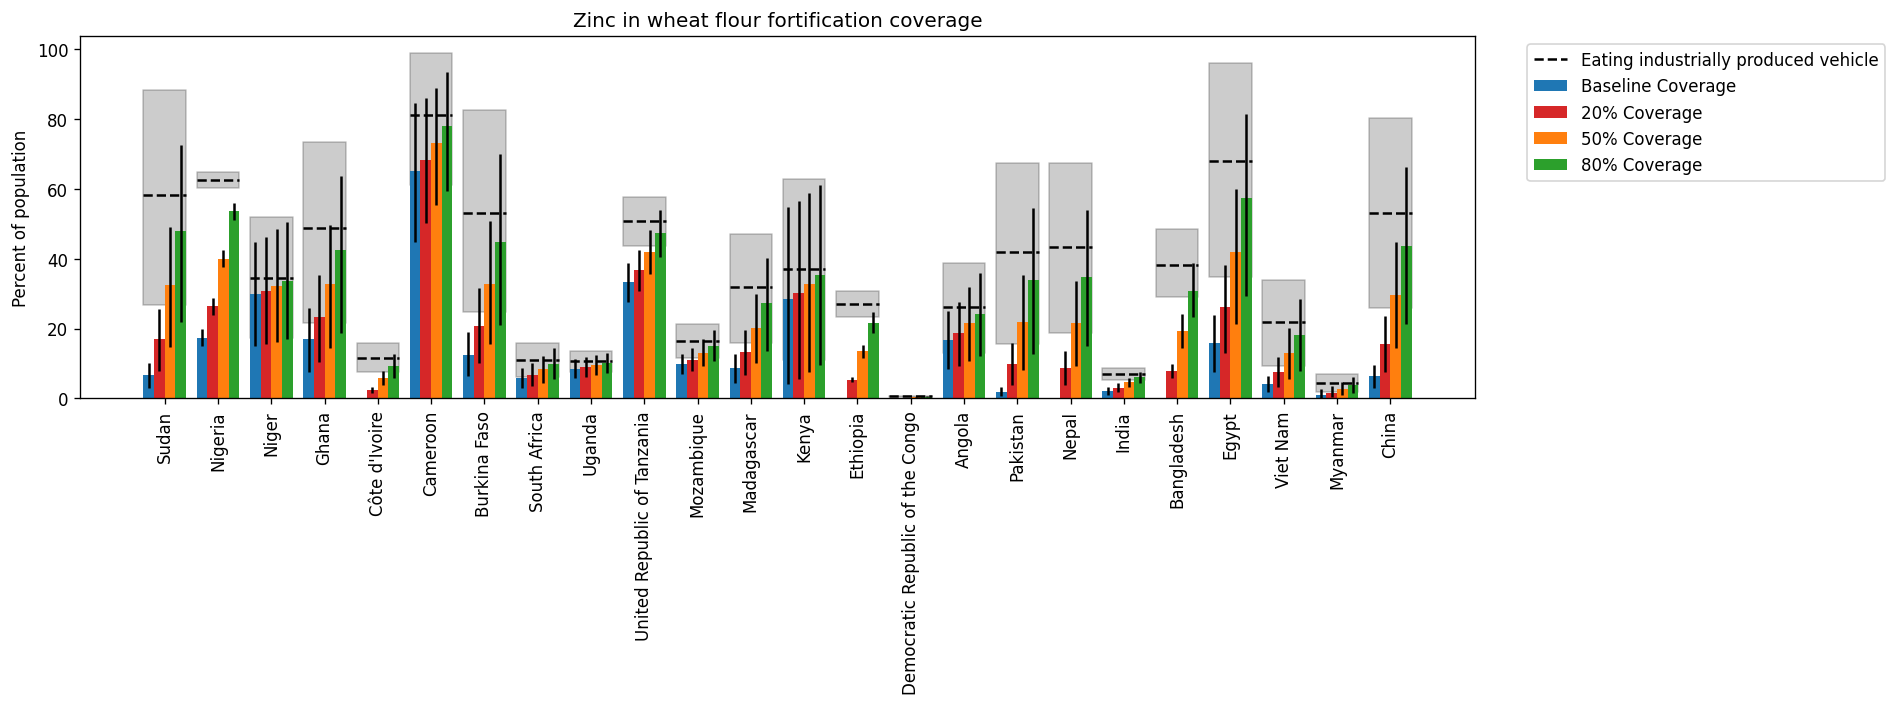

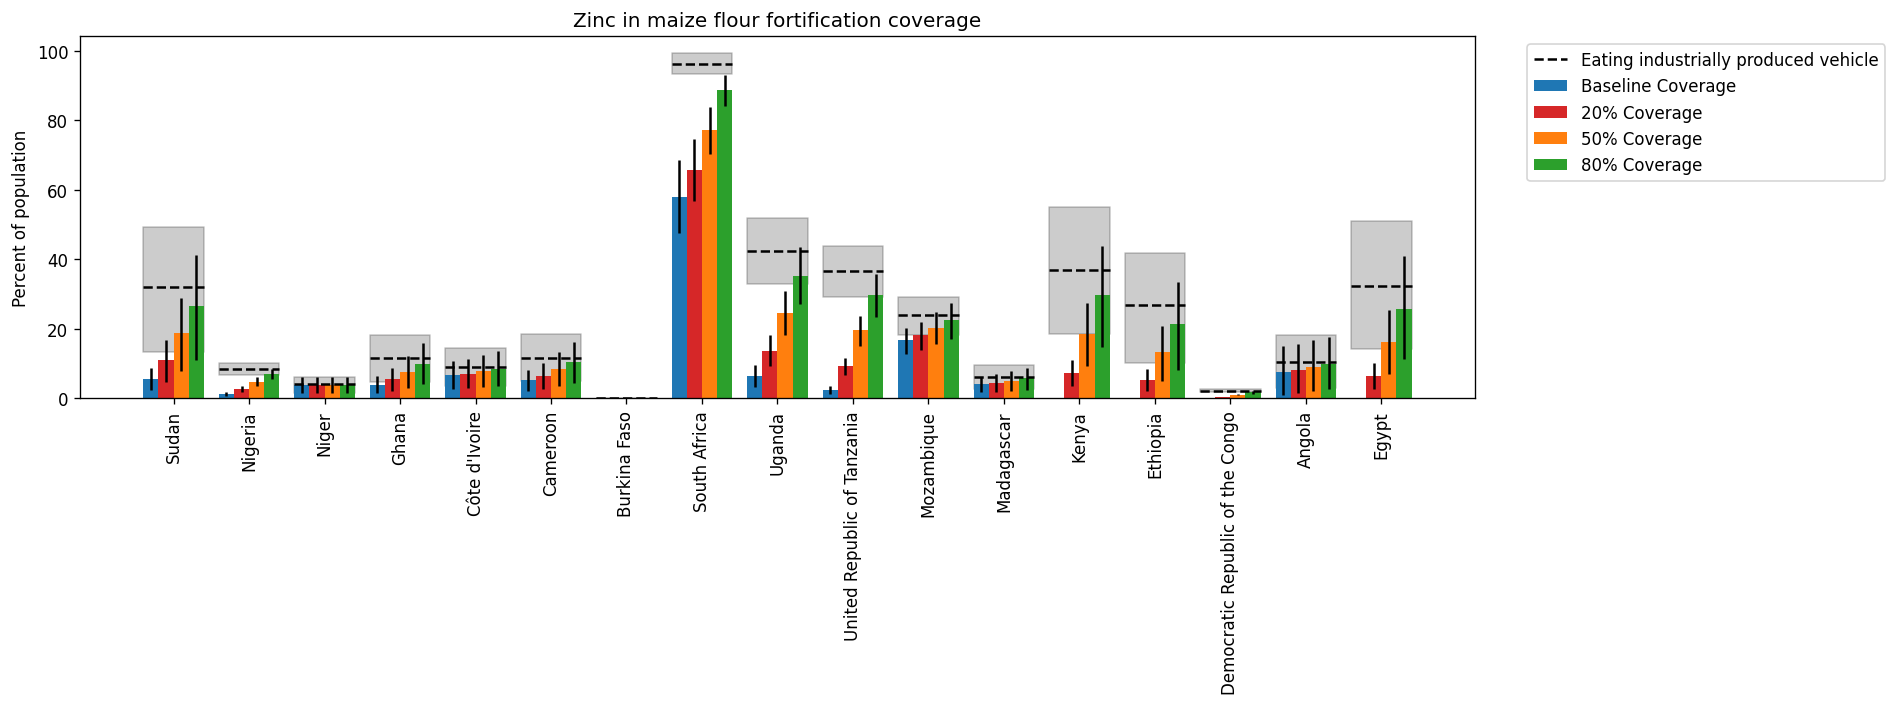

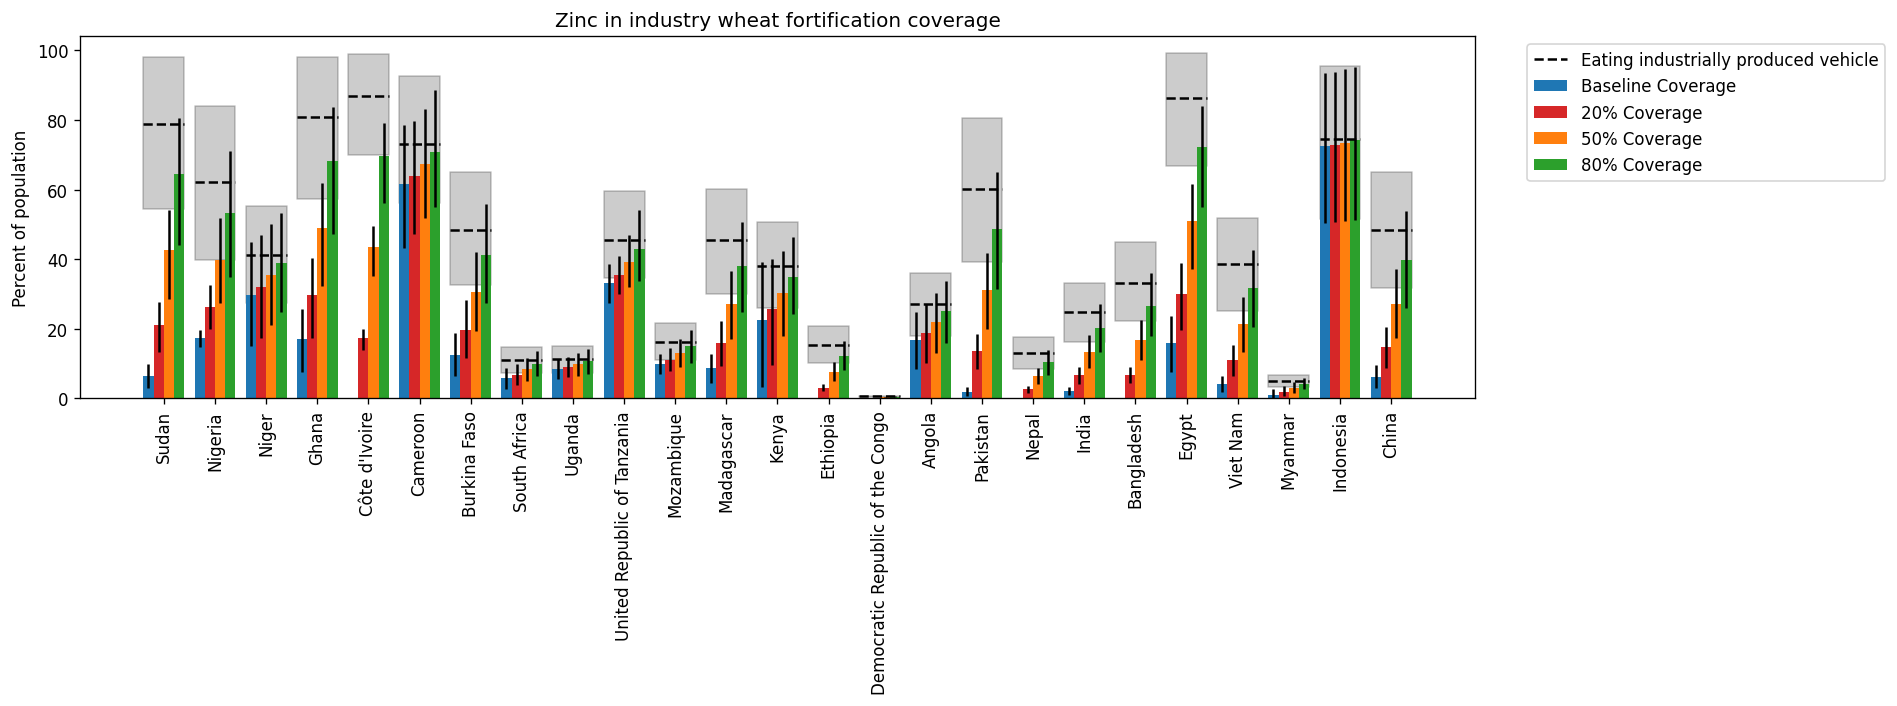

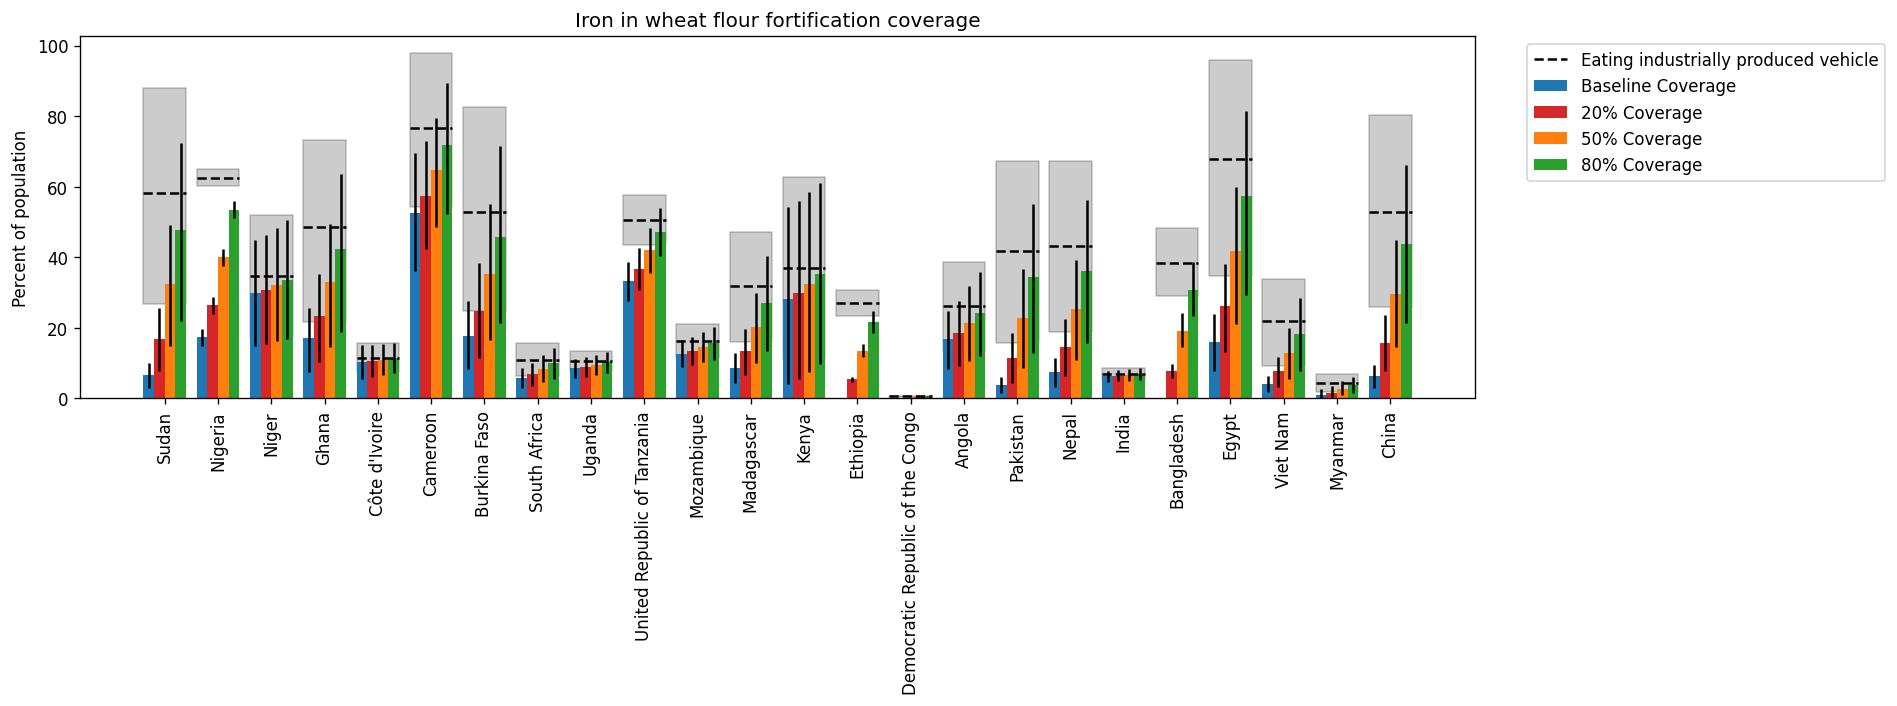

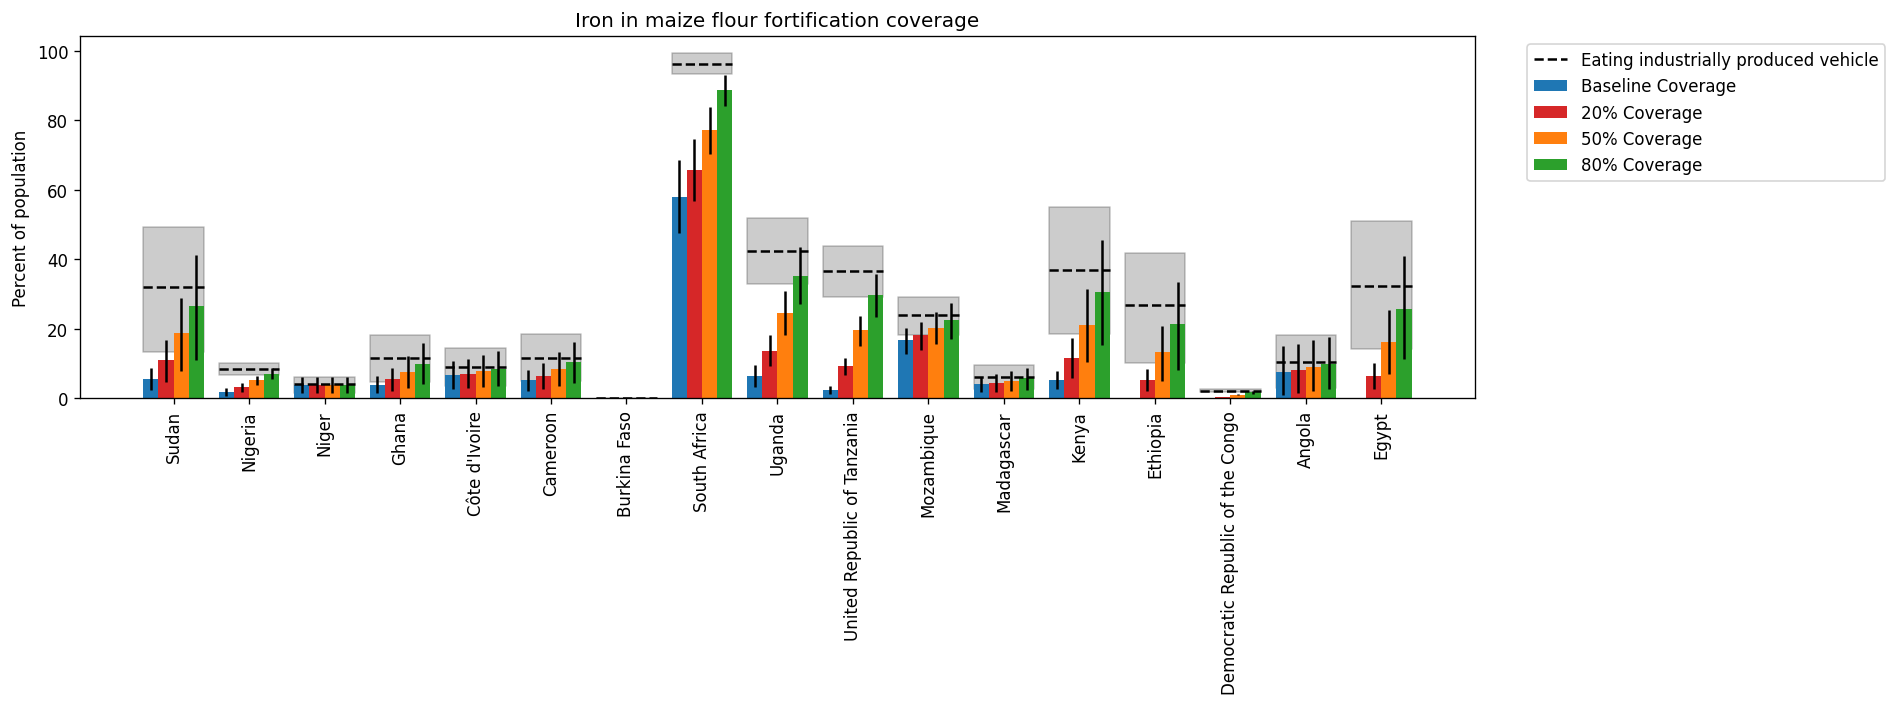

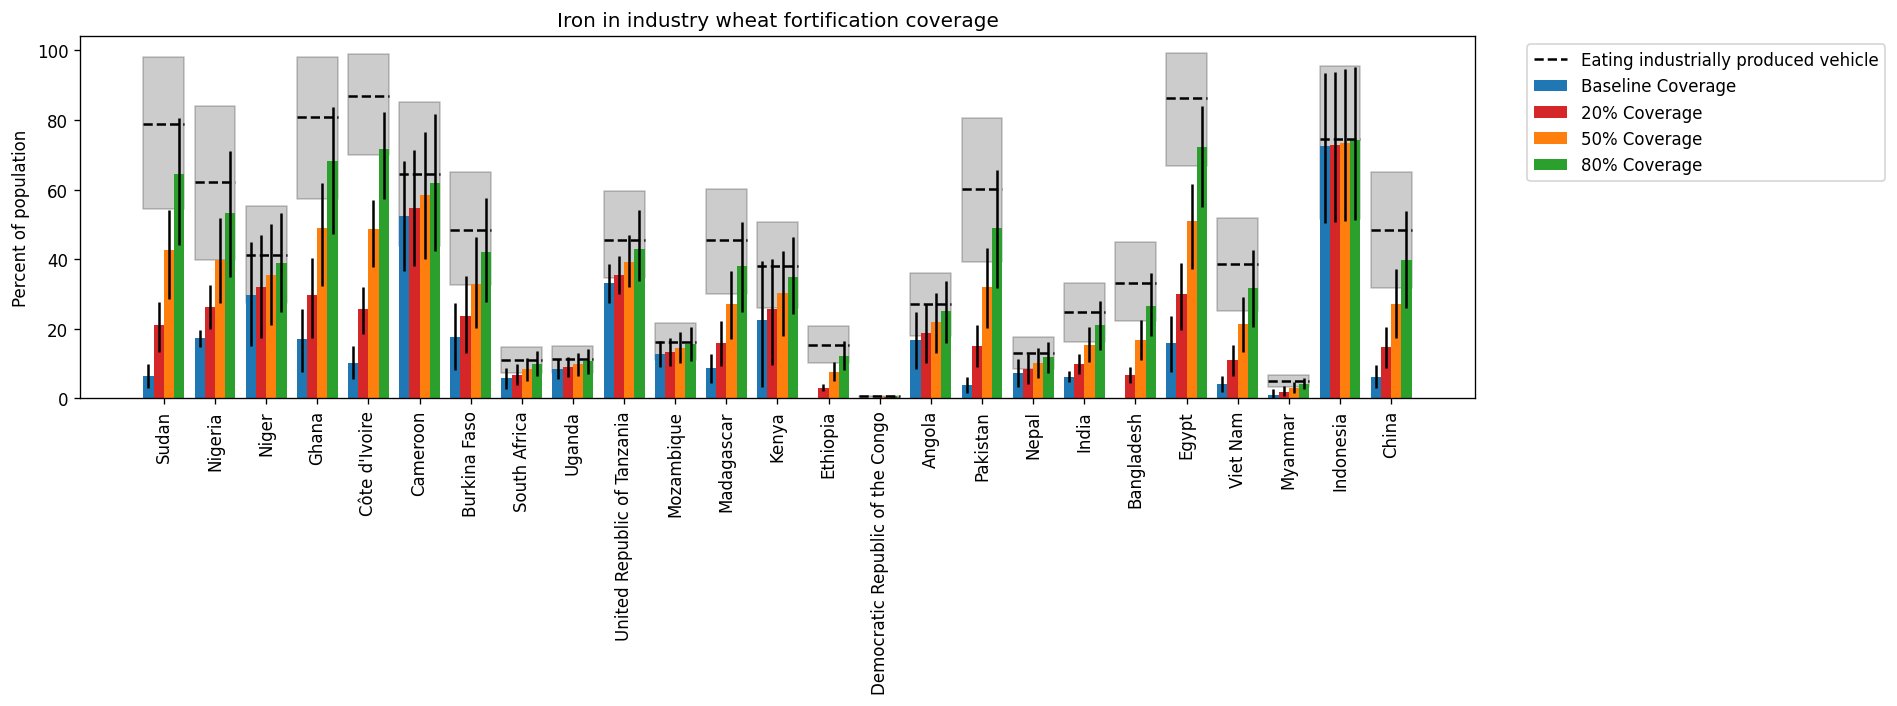

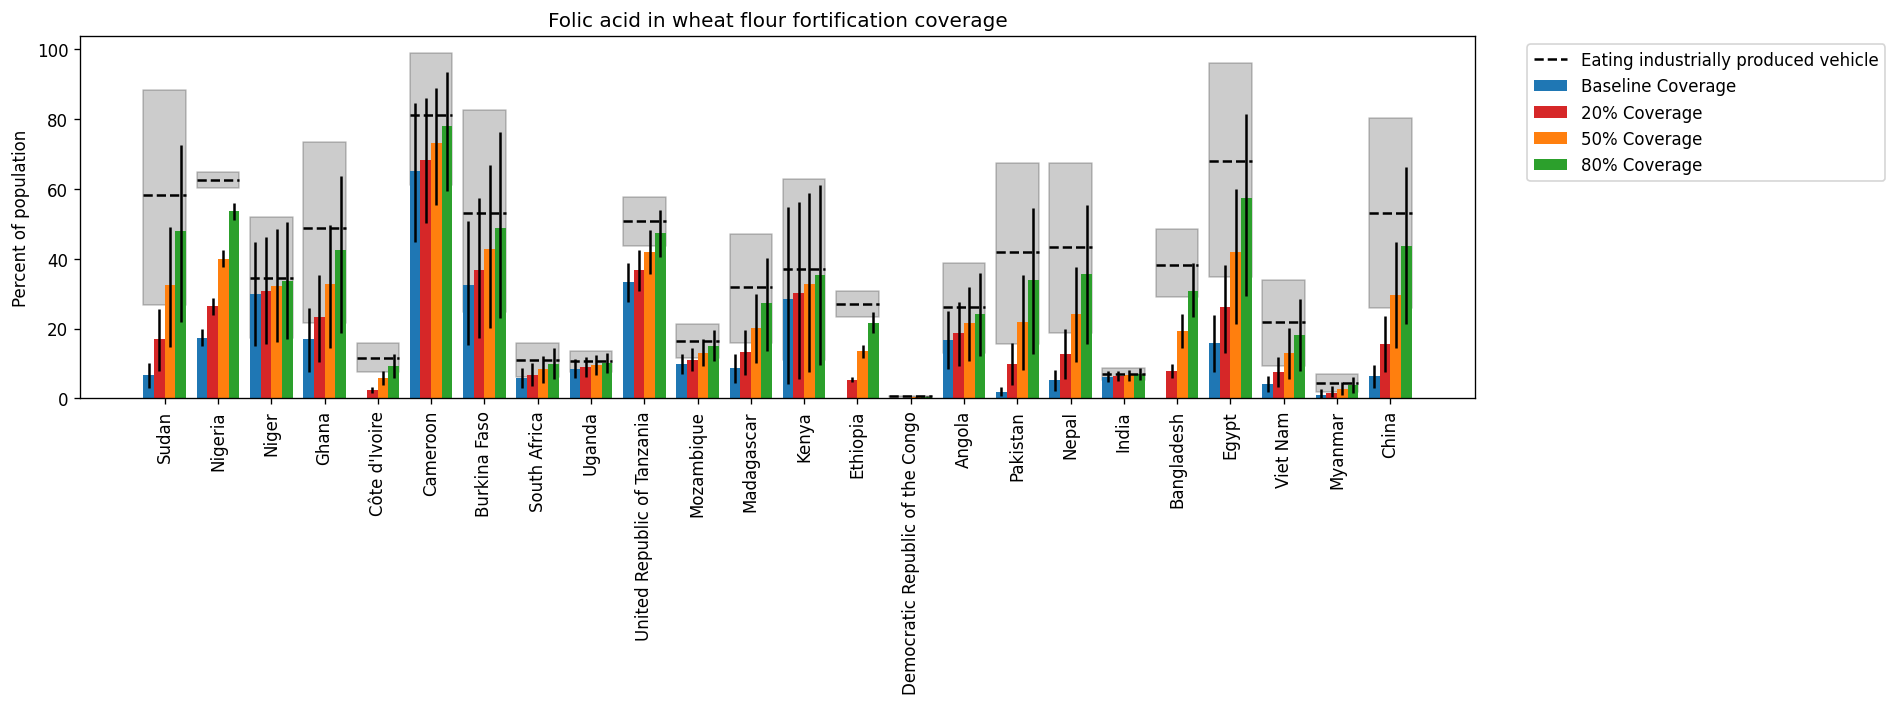

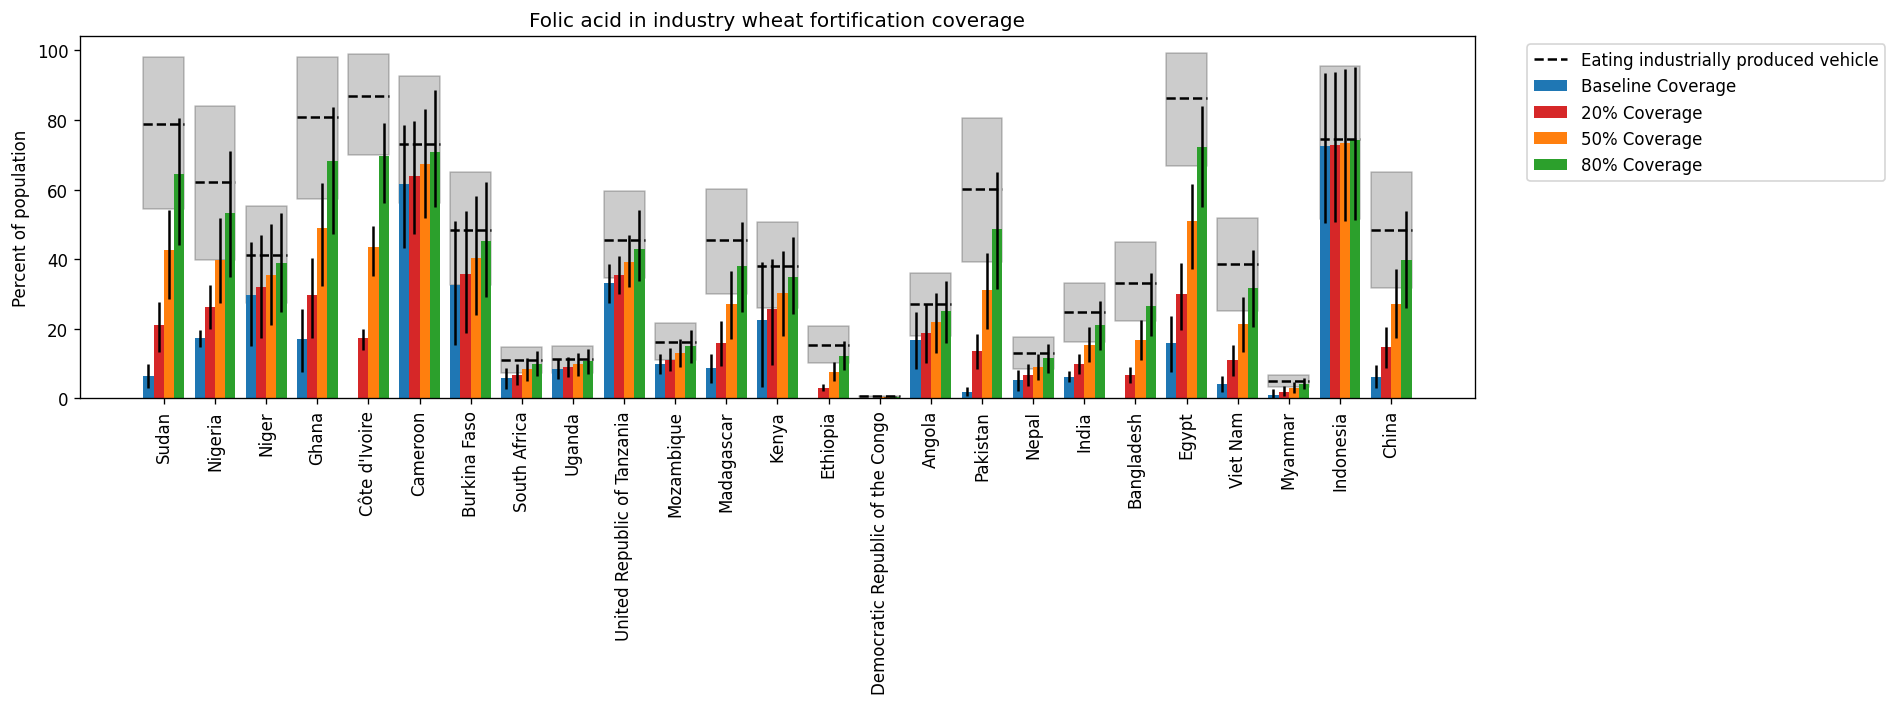

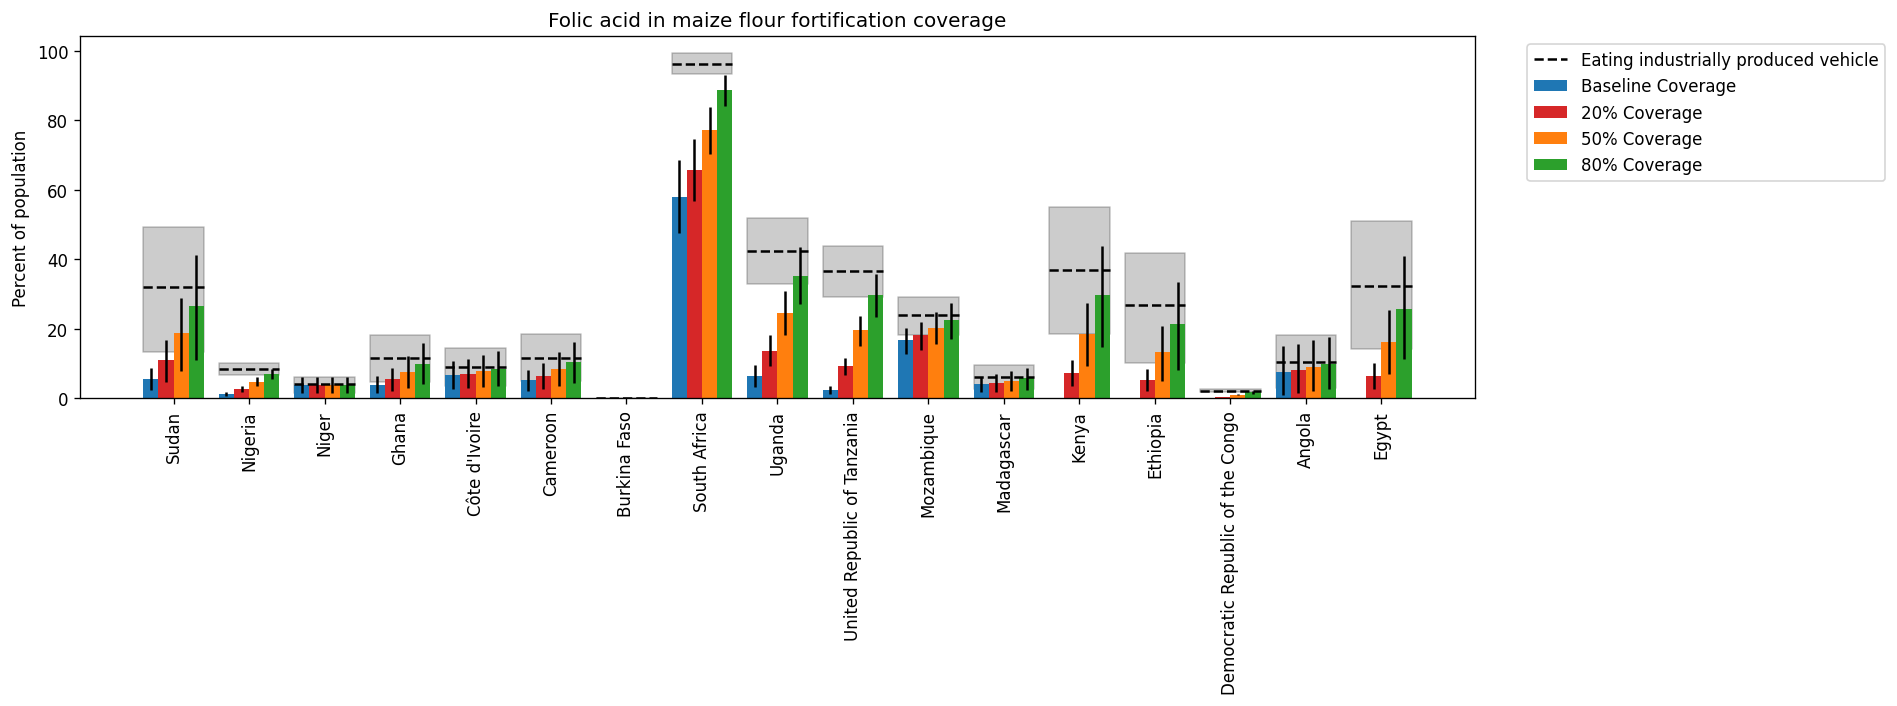

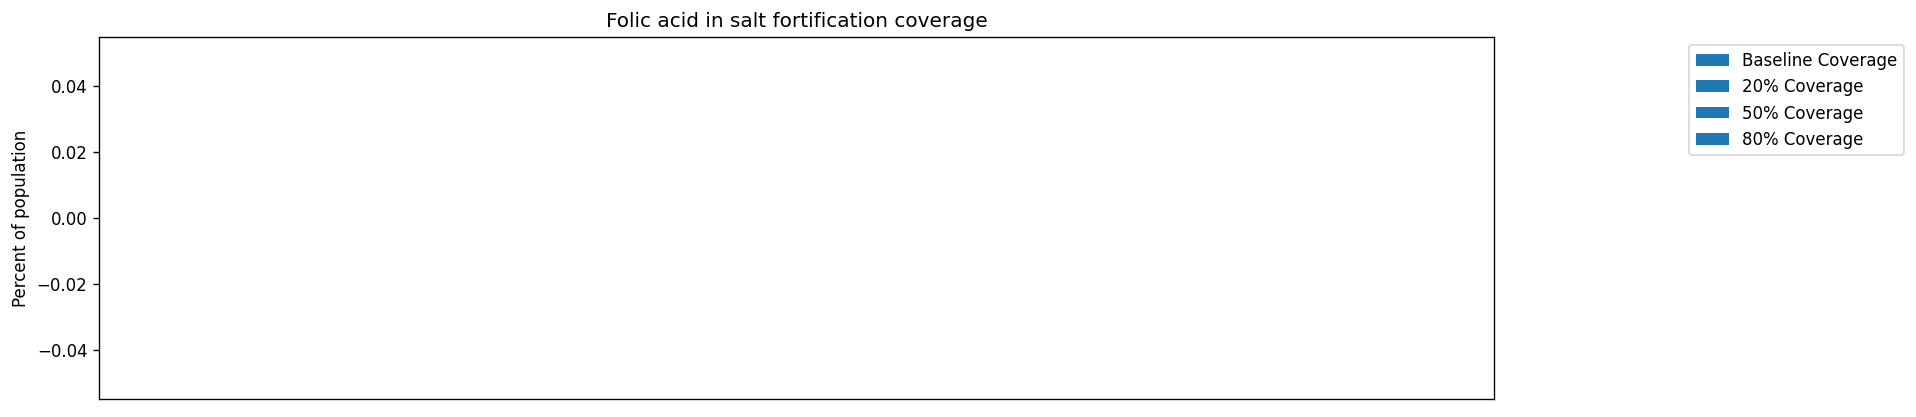

In [31]:
with PdfPages('results_plots/coverage_plots_u5.pdf') as pdf:
    for nutrient in nutrients:
        if nutrient == 'vitamin a':
            vehicles = ['oil','wheat flour','maize flour','industry oil','industry wheat']
        elif nutrient == 'folic acid':
            vehicles = ['wheat flour','industry wheat','maize flour','salt']
        else:
            vehicles = ['wheat flour', 'maize flour','industry wheat']
        for vehicle in vehicles:
            make_coverage_bar_charts(coverage_u5_summarized, location_ids, nutrient, vehicle)
            pdf.savefig(bbox_inches='tight')

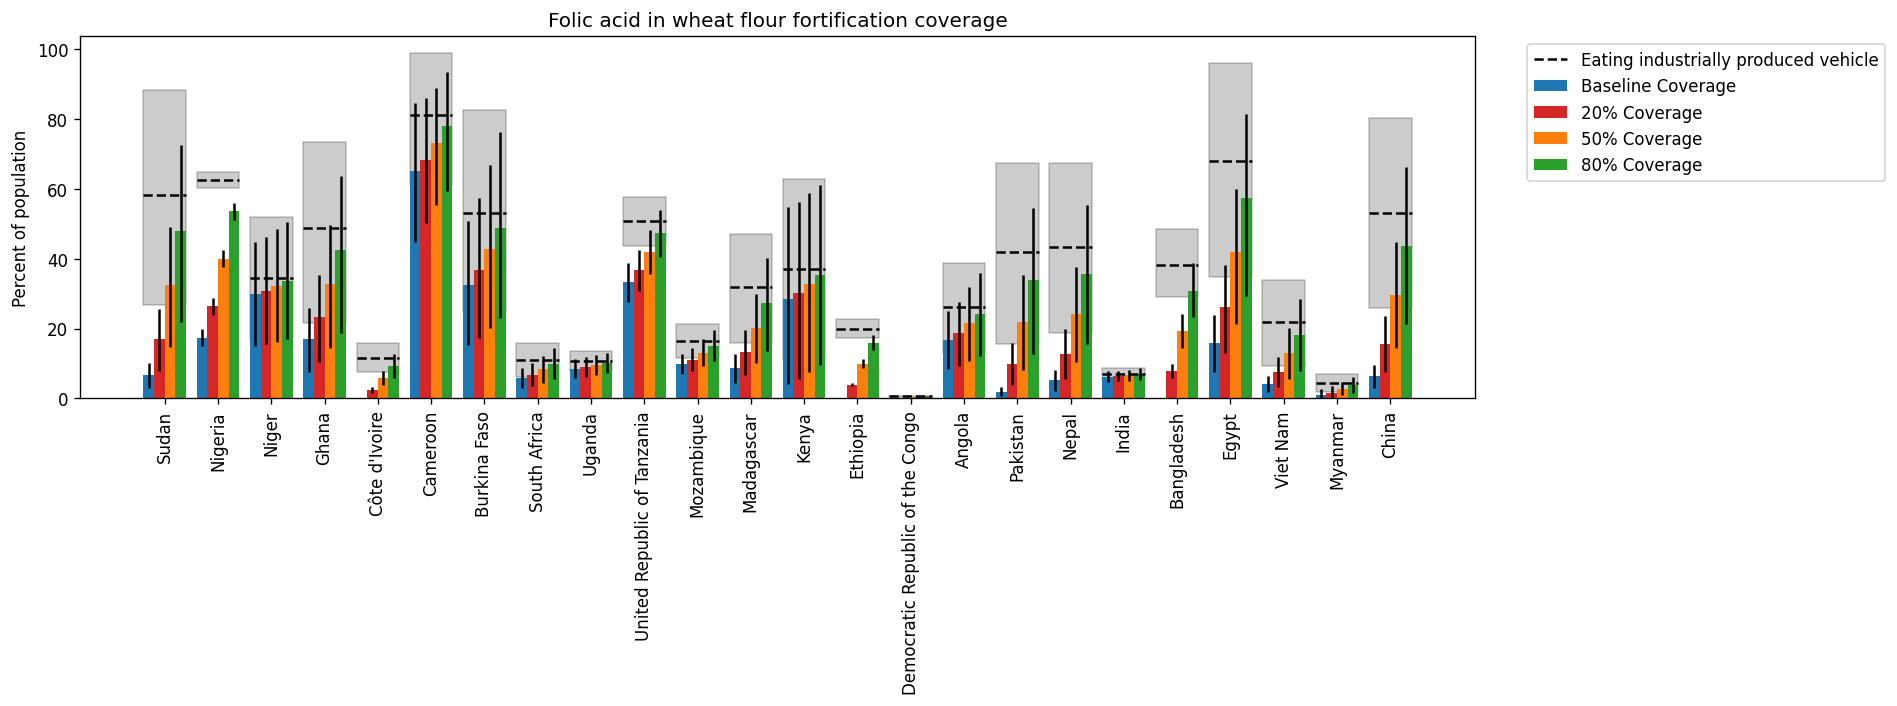

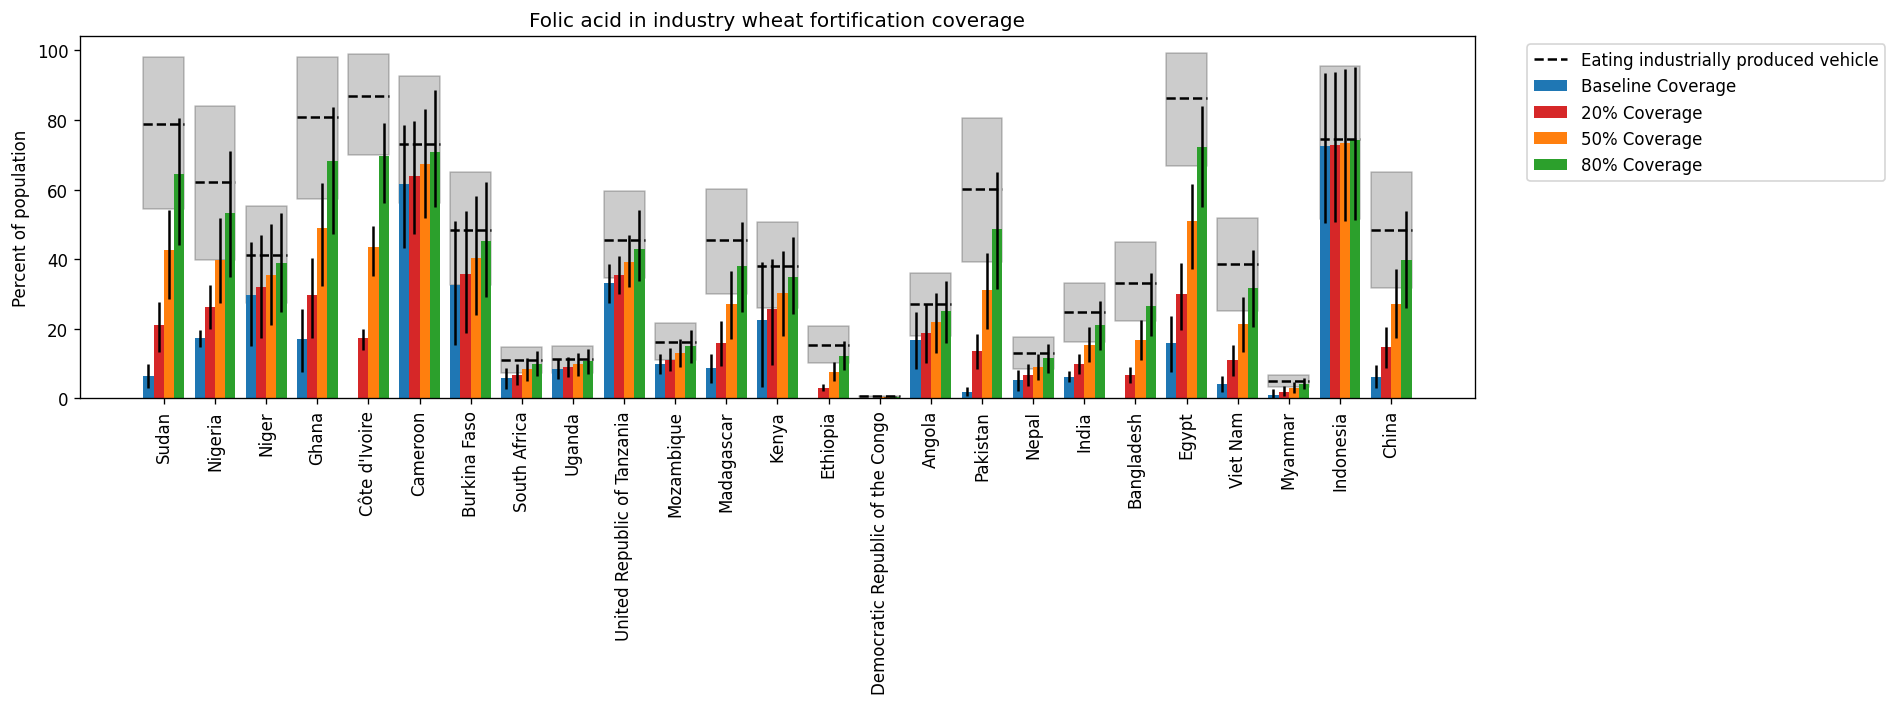

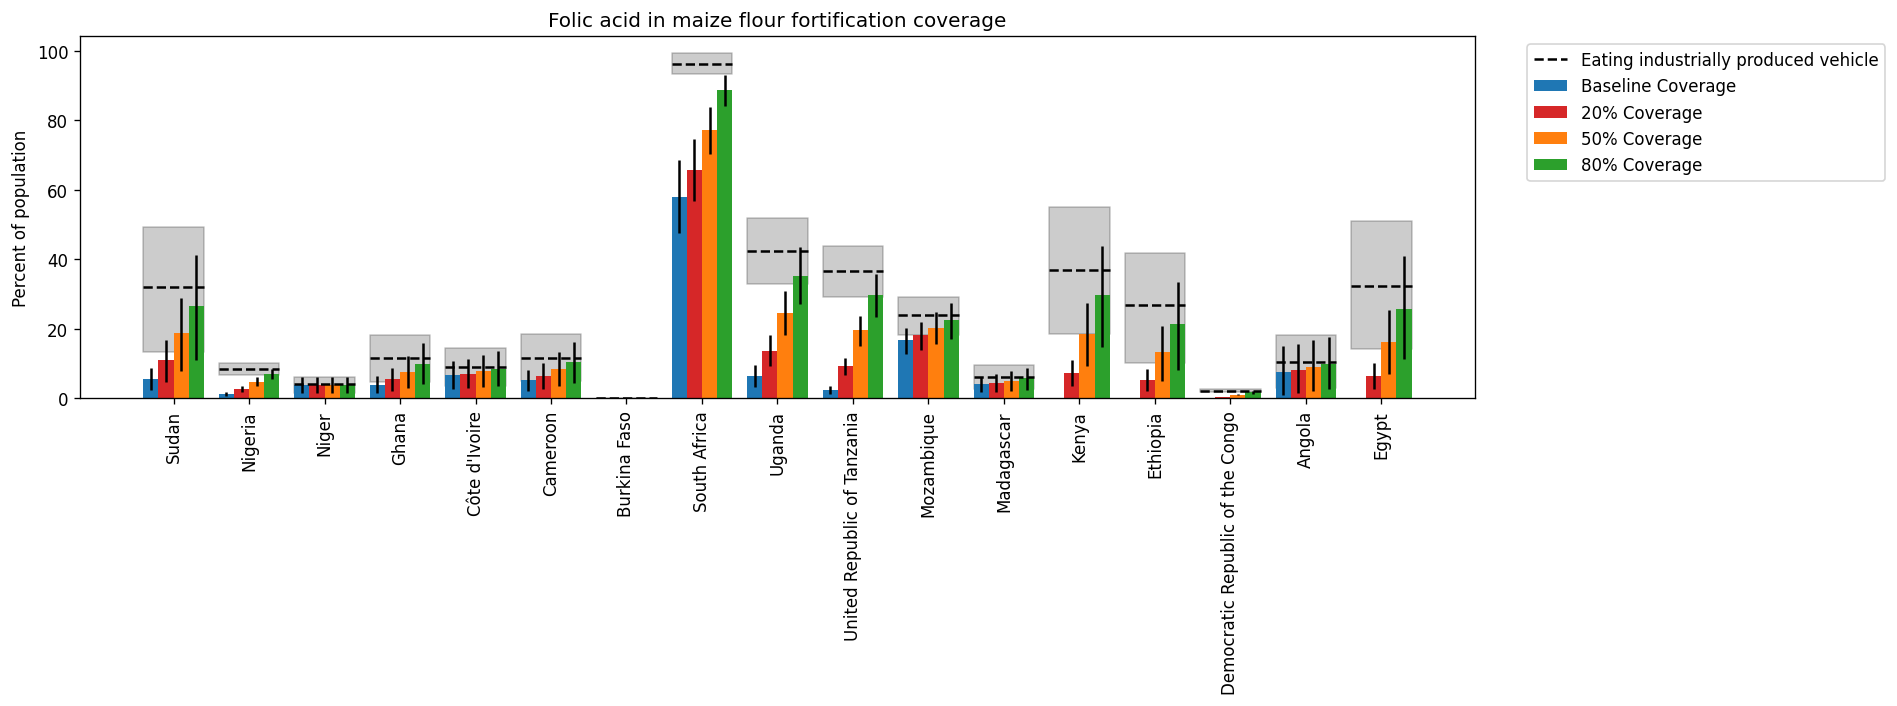

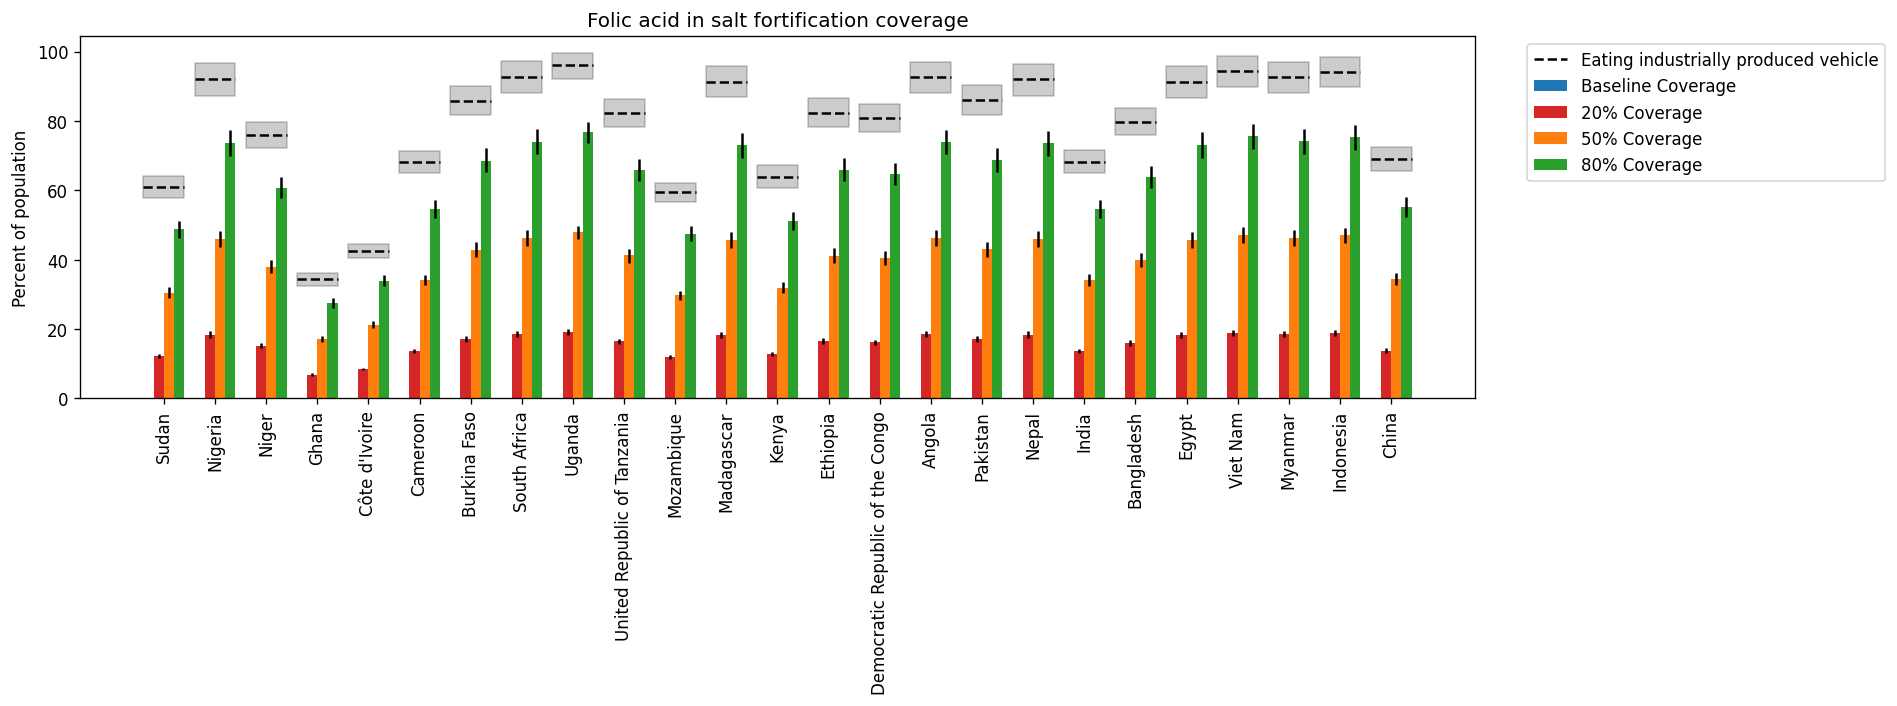

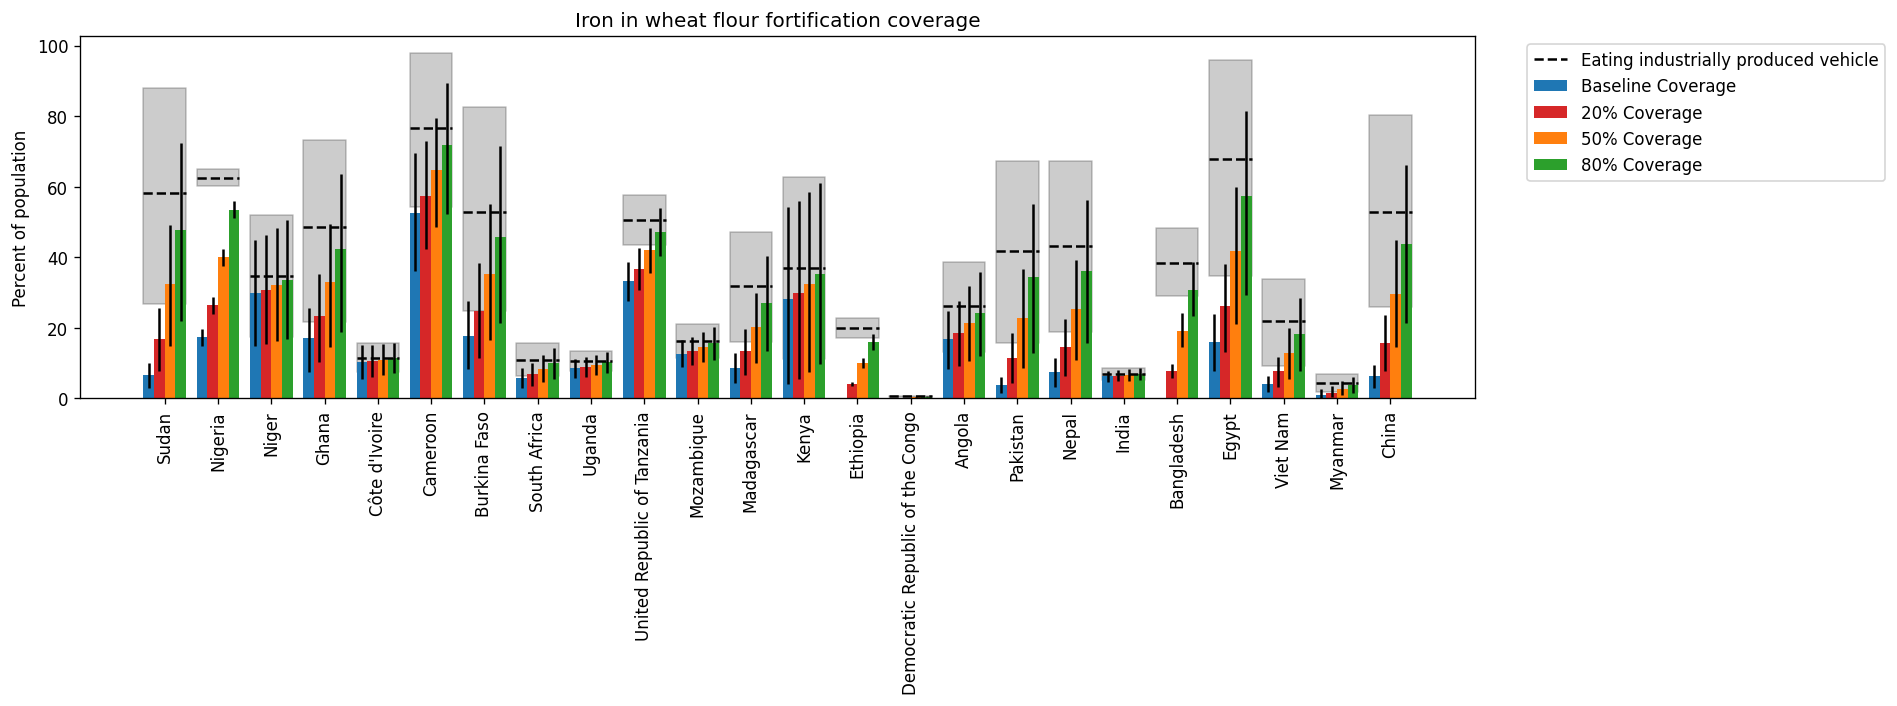

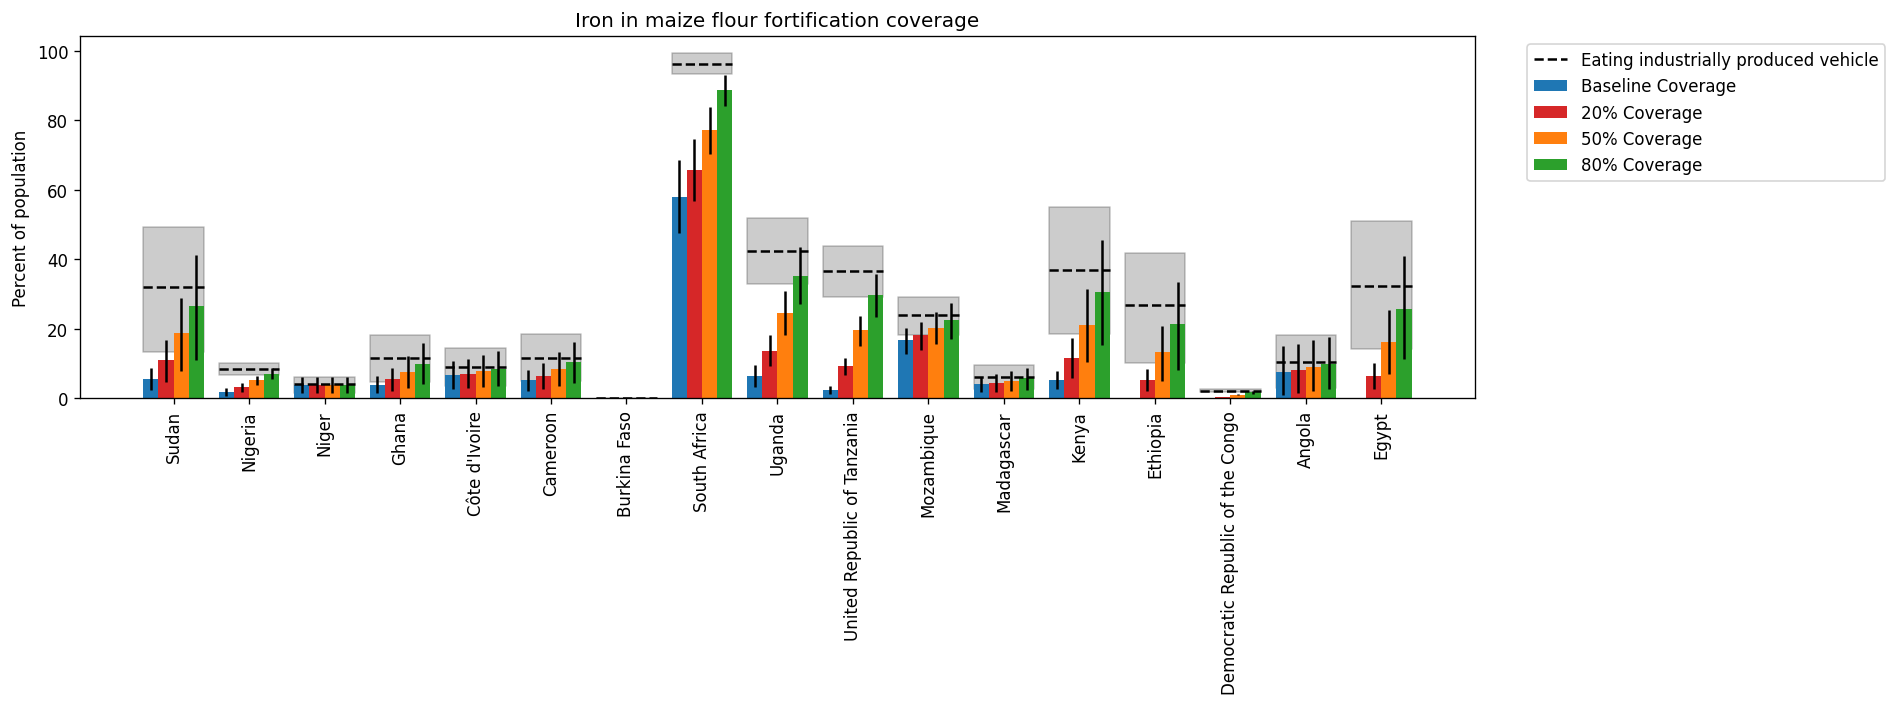

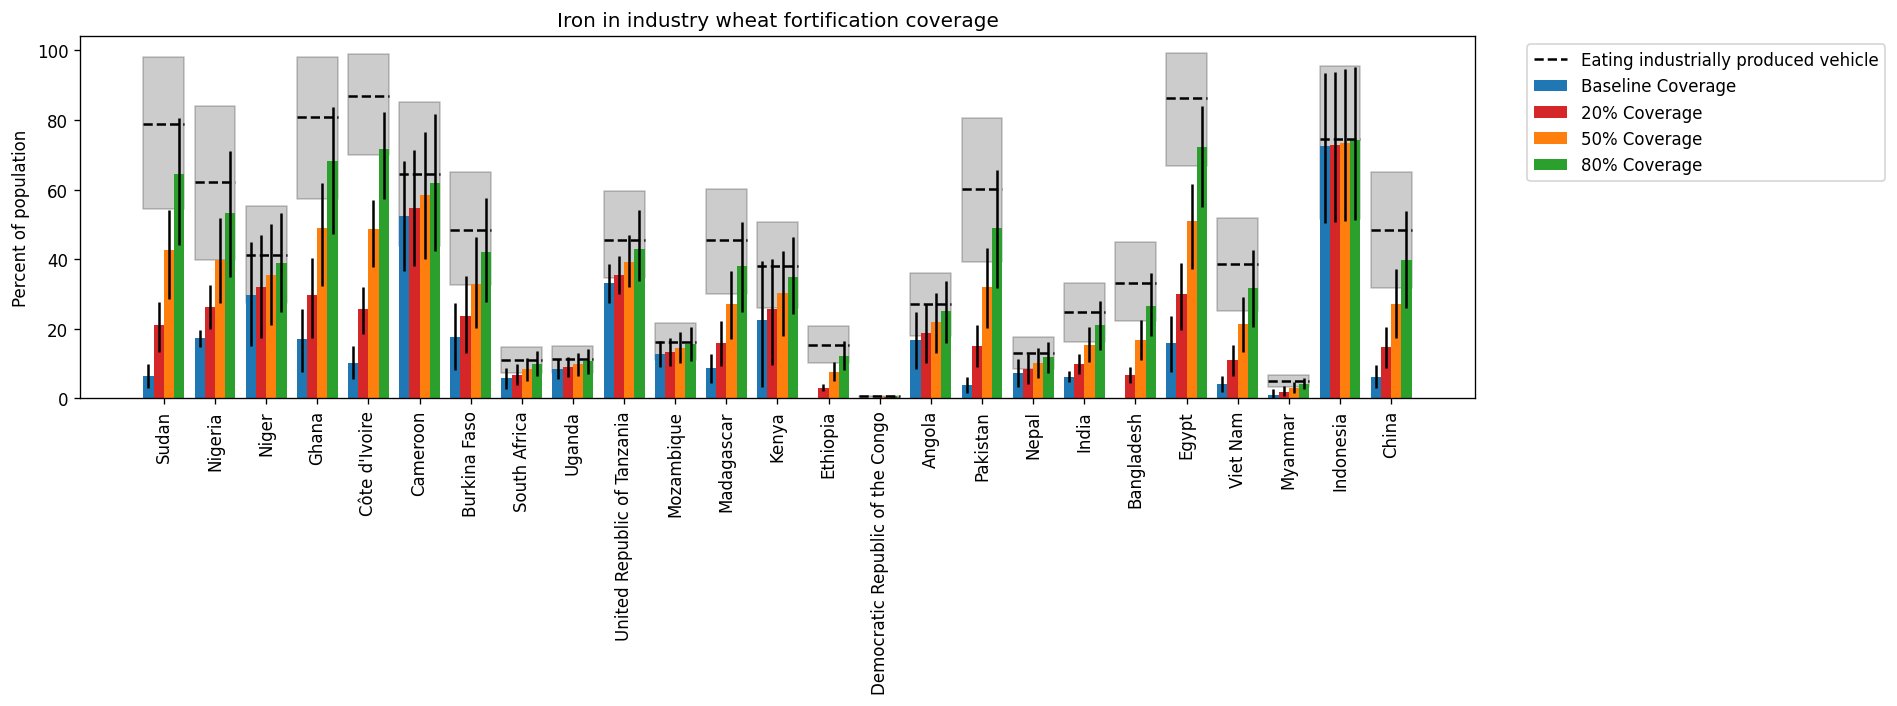

In [33]:
with PdfPages('results_plots/coverage_plots_wra.pdf') as pdf:
    for nutrient in ['folic acid','iron']:
        if nutrient == 'folic acid':
            vehicles = ['wheat flour','industry wheat','maize flour','salt']
        else:
            vehicles = ['wheat flour', 'maize flour','industry wheat']
        for vehicle in vehicles:
            make_coverage_bar_charts(coverage_wra_summarized, location_ids, nutrient, vehicle)
            pdf.savefig(bbox_inches='tight')